In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from A3C import A3C
from utils import discount
from run_session import run_session
device = 0
np.random.seed(12345)
torch.random.manual_seed(12345)

## Difference from tensorflow implementation(so far)
1. Time step is not input to neural net
2. Initial state is initialized randomly and learnable, instead of zero

In [2]:
def generate_left_prob(held_out_range):
    def check_heldout(left_prob):
        inrange = False
        for low, high in held_out_range:
            if left_prob>low and left_prob<high:
                inrange = True
        return inrange
    left_prob = -1
    while left_prob<0 or left_prob>0.5 or check_heldout(left_prob):
        left_prob = np.random.uniform(0, 0.5)
    return left_prob


class lever():
    def __init__(self, left_prob):
        super().__init__()
        self.num_presses = np.random.randint(50, 101) # perhaps this number needs to be changed
        self.state = [0, 0]
        self.left_prob = left_prob
        self.pull(0)
        
    def pull(self, action): # get next trial after action
        left_prob = self.left_prob
        right_prob = 0.5-left_prob
        assert 0<=left_prob and left_prob<=0.5, "probability out of range"
        reward = self.state[action]
        self.state[action] = 0
        if np.random.uniform()<left_prob:
            self.state[0] = 1
        if np.random.uniform()<right_prob:
            self.state[1] = 1
        return reward

In [3]:
minimum = 30
for i in range(10000):
    minimum = min(minimum, np.random.uniform())

In [4]:
agent = A3C().cuda(device)
optimizer = torch.optim.RMSprop(agent.parameters(), 0.0007)

In [5]:
# train or load
for session_num in range(20000):
    holdout = [[0.1, 0.2], [0.3, 0.4]]
    left_prob = generate_left_prob(holdout)
    experiment = lever(left_prob)
    run_session(experiment, agent, optimizer, session_num)

session: 0 reward: 0.3333333333333333
session: 1 reward: 0.4155844155844156
session: 2 reward: 0.4166666666666667
session: 3 reward: 0.3870967741935484
session: 4 reward: 0.29508196721311475
session: 5 reward: 0.40963855421686746
session: 6 reward: 0.4731182795698925
session: 7 reward: 0.28888888888888886
session: 8 reward: 0.31521739130434784
session: 9 reward: 0.4305555555555556
session: 10 reward: 0.2777777777777778
session: 11 reward: 0.3225806451612903
session: 12 reward: 0.4307692307692308
session: 13 reward: 0.3148148148148148
session: 14 reward: 0.38372093023255816
session: 15 reward: 0.3382352941176471
session: 16 reward: 0.3137254901960784
session: 17 reward: 0.39655172413793105
session: 18 reward: 0.36666666666666664
session: 19 reward: 0.4126984126984127
session: 20 reward: 0.4861111111111111
session: 21 reward: 0.3763440860215054
session: 22 reward: 0.3488372093023256
session: 23 reward: 0.3508771929824561
session: 24 reward: 0.3793103448275862
session: 25 reward: 0.373134

session: 216 reward: 0.35185185185185186
session: 217 reward: 0.46511627906976744
session: 218 reward: 0.3442622950819672
session: 219 reward: 0.37254901960784315
session: 220 reward: 0.3090909090909091
session: 221 reward: 0.34408602150537637
session: 222 reward: 0.5
session: 223 reward: 0.33783783783783783
session: 224 reward: 0.41935483870967744
session: 225 reward: 0.3888888888888889
session: 226 reward: 0.3448275862068966
session: 227 reward: 0.38961038961038963
session: 228 reward: 0.28169014084507044
session: 229 reward: 0.4642857142857143
session: 230 reward: 0.4225352112676056
session: 231 reward: 0.32
session: 232 reward: 0.44329896907216493
session: 233 reward: 0.3146067415730337
session: 234 reward: 0.43434343434343436
session: 235 reward: 0.4270833333333333
session: 236 reward: 0.3723404255319149
session: 237 reward: 0.2872340425531915
session: 238 reward: 0.3142857142857143
session: 239 reward: 0.3582089552238806
session: 240 reward: 0.3037974683544304
session: 241 reward

session: 431 reward: 0.43548387096774194
session: 432 reward: 0.34
session: 433 reward: 0.36
session: 434 reward: 0.35714285714285715
session: 435 reward: 0.35365853658536583
session: 436 reward: 0.28846153846153844
session: 437 reward: 0.36363636363636365
session: 438 reward: 0.35802469135802467
session: 439 reward: 0.2857142857142857
session: 440 reward: 0.42
session: 441 reward: 0.37662337662337664
session: 442 reward: 0.38271604938271603
session: 443 reward: 0.3132530120481928
session: 444 reward: 0.40860215053763443
session: 445 reward: 0.37037037037037035
session: 446 reward: 0.34
session: 447 reward: 0.2727272727272727
session: 448 reward: 0.34375
session: 449 reward: 0.35185185185185186
session: 450 reward: 0.4588235294117647
session: 451 reward: 0.30337078651685395
session: 452 reward: 0.2878787878787879
session: 453 reward: 0.44
session: 454 reward: 0.5084745762711864
session: 455 reward: 0.2891566265060241
session: 456 reward: 0.423728813559322
session: 457 reward: 0.3529411

session: 648 reward: 0.36
session: 649 reward: 0.36231884057971014
session: 650 reward: 0.4918032786885246
session: 651 reward: 0.39361702127659576
session: 652 reward: 0.4659090909090909
session: 653 reward: 0.27
session: 654 reward: 0.49206349206349204
session: 655 reward: 0.34545454545454546
session: 656 reward: 0.3058823529411765
session: 657 reward: 0.3333333333333333
session: 658 reward: 0.42857142857142855
session: 659 reward: 0.3382352941176471
session: 660 reward: 0.44871794871794873
session: 661 reward: 0.328125
session: 662 reward: 0.33707865168539325
session: 663 reward: 0.3770491803278688
session: 664 reward: 0.42857142857142855
session: 665 reward: 0.36
session: 666 reward: 0.3409090909090909
session: 667 reward: 0.3829787234042553
session: 668 reward: 0.44
session: 669 reward: 0.43137254901960786
session: 670 reward: 0.3829787234042553
session: 671 reward: 0.4067796610169492
session: 672 reward: 0.3246753246753247
session: 673 reward: 0.37777777777777777
session: 674 rew

session: 864 reward: 0.34375
session: 865 reward: 0.41379310344827586
session: 866 reward: 0.3333333333333333
session: 867 reward: 0.32978723404255317
session: 868 reward: 0.3088235294117647
session: 869 reward: 0.3614457831325301
session: 870 reward: 0.31645569620253167
session: 871 reward: 0.4
session: 872 reward: 0.31868131868131866
session: 873 reward: 0.3333333333333333
session: 874 reward: 0.4270833333333333
session: 875 reward: 0.5172413793103449
session: 876 reward: 0.3787878787878788
session: 877 reward: 0.29545454545454547
session: 878 reward: 0.35294117647058826
session: 879 reward: 0.3076923076923077
session: 880 reward: 0.38333333333333336
session: 881 reward: 0.39436619718309857
session: 882 reward: 0.37209302325581395
session: 883 reward: 0.453125
session: 884 reward: 0.42592592592592593
session: 885 reward: 0.336734693877551
session: 886 reward: 0.34375
session: 887 reward: 0.3469387755102041
session: 888 reward: 0.41025641025641024
session: 889 reward: 0.37735849056603

session: 1074 reward: 0.36486486486486486
session: 1075 reward: 0.3220338983050847
session: 1076 reward: 0.42857142857142855
session: 1077 reward: 0.4
session: 1078 reward: 0.42528735632183906
session: 1079 reward: 0.48484848484848486
session: 1080 reward: 0.3384615384615385
session: 1081 reward: 0.37349397590361444
session: 1082 reward: 0.3194444444444444
session: 1083 reward: 0.3194444444444444
session: 1084 reward: 0.30864197530864196
session: 1085 reward: 0.4069767441860465
session: 1086 reward: 0.36
session: 1087 reward: 0.39436619718309857
session: 1088 reward: 0.31645569620253167
session: 1089 reward: 0.3404255319148936
session: 1090 reward: 0.3333333333333333
session: 1091 reward: 0.36363636363636365
session: 1092 reward: 0.36470588235294116
session: 1093 reward: 0.3333333333333333
session: 1094 reward: 0.4125
session: 1095 reward: 0.36065573770491804
session: 1096 reward: 0.5223880597014925
session: 1097 reward: 0.38372093023255816
session: 1098 reward: 0.39
session: 1099 rewa

session: 1285 reward: 0.3684210526315789
session: 1286 reward: 0.4146341463414634
session: 1287 reward: 0.37333333333333335
session: 1288 reward: 0.36507936507936506
session: 1289 reward: 0.31343283582089554
session: 1290 reward: 0.29896907216494845
session: 1291 reward: 0.38028169014084506
session: 1292 reward: 0.3473684210526316
session: 1293 reward: 0.4883720930232558
session: 1294 reward: 0.5
session: 1295 reward: 0.43373493975903615
session: 1296 reward: 0.4069767441860465
session: 1297 reward: 0.4307692307692308
session: 1298 reward: 0.3978494623655914
session: 1299 reward: 0.375
session: 1300 reward: 0.38271604938271603
session: 1301 reward: 0.29213483146067415
session: 1302 reward: 0.3764705882352941
session: 1303 reward: 0.39215686274509803
session: 1304 reward: 0.30927835051546393
session: 1305 reward: 0.3723404255319149
session: 1306 reward: 0.42424242424242425
session: 1307 reward: 0.43478260869565216
session: 1308 reward: 0.45
session: 1309 reward: 0.358695652173913
sessio

session: 1493 reward: 0.2948717948717949
session: 1494 reward: 0.5
session: 1495 reward: 0.3711340206185567
session: 1496 reward: 0.32432432432432434
session: 1497 reward: 0.3626373626373626
session: 1498 reward: 0.3875
session: 1499 reward: 0.3684210526315789
session: 1500 reward: 0.33962264150943394
session: 1501 reward: 0.3770491803278688
session: 1502 reward: 0.32653061224489793
session: 1503 reward: 0.38961038961038963
session: 1504 reward: 0.46
session: 1505 reward: 0.3620689655172414
session: 1506 reward: 0.40625
session: 1507 reward: 0.38461538461538464
session: 1508 reward: 0.3333333333333333
session: 1509 reward: 0.3950617283950617
session: 1510 reward: 0.32941176470588235
session: 1511 reward: 0.2564102564102564
session: 1512 reward: 0.47619047619047616
session: 1513 reward: 0.3804347826086957
session: 1514 reward: 0.32432432432432434
session: 1515 reward: 0.47761194029850745
session: 1516 reward: 0.42028985507246375
session: 1517 reward: 0.3855421686746988
session: 1518 rew

session: 1704 reward: 0.41509433962264153
session: 1705 reward: 0.44871794871794873
session: 1706 reward: 0.4444444444444444
session: 1707 reward: 0.2926829268292683
session: 1708 reward: 0.3709677419354839
session: 1709 reward: 0.36666666666666664
session: 1710 reward: 0.39655172413793105
session: 1711 reward: 0.40789473684210525
session: 1712 reward: 0.4264705882352941
session: 1713 reward: 0.3815789473684211
session: 1714 reward: 0.45098039215686275
session: 1715 reward: 0.42028985507246375
session: 1716 reward: 0.36507936507936506
session: 1717 reward: 0.37735849056603776
session: 1718 reward: 0.3387096774193548
session: 1719 reward: 0.39655172413793105
session: 1720 reward: 0.4065934065934066
session: 1721 reward: 0.37755102040816324
session: 1722 reward: 0.3333333333333333
session: 1723 reward: 0.3854166666666667
session: 1724 reward: 0.32098765432098764
session: 1725 reward: 0.29347826086956524
session: 1726 reward: 0.32
session: 1727 reward: 0.3787878787878788
session: 1728 rew

session: 1912 reward: 0.32432432432432434
session: 1913 reward: 0.4186046511627907
session: 1914 reward: 0.37681159420289856
session: 1915 reward: 0.32989690721649484
session: 1916 reward: 0.43373493975903615
session: 1917 reward: 0.3625
session: 1918 reward: 0.36231884057971014
session: 1919 reward: 0.31645569620253167
session: 1920 reward: 0.3888888888888889
session: 1921 reward: 0.3103448275862069
session: 1922 reward: 0.3333333333333333
session: 1923 reward: 0.39436619718309857
session: 1924 reward: 0.3333333333333333
session: 1925 reward: 0.3614457831325301
session: 1926 reward: 0.4482758620689655
session: 1927 reward: 0.3472222222222222
session: 1928 reward: 0.45569620253164556
session: 1929 reward: 0.4431818181818182
session: 1930 reward: 0.4153846153846154
session: 1931 reward: 0.3670886075949367
session: 1932 reward: 0.35064935064935066
session: 1933 reward: 0.417910447761194
session: 1934 reward: 0.410958904109589
session: 1935 reward: 0.4230769230769231
session: 1936 reward:

session: 2122 reward: 0.4166666666666667
session: 2123 reward: 0.5074626865671642
session: 2124 reward: 0.42857142857142855
session: 2125 reward: 0.4605263157894737
session: 2126 reward: 0.4166666666666667
session: 2127 reward: 0.4
session: 2128 reward: 0.43103448275862066
session: 2129 reward: 0.3114754098360656
session: 2130 reward: 0.34375
session: 2131 reward: 0.3684210526315789
session: 2132 reward: 0.42857142857142855
session: 2133 reward: 0.37333333333333335
session: 2134 reward: 0.4166666666666667
session: 2135 reward: 0.3684210526315789
session: 2136 reward: 0.4222222222222222
session: 2137 reward: 0.3442622950819672
session: 2138 reward: 0.3684210526315789
session: 2139 reward: 0.44642857142857145
session: 2140 reward: 0.3559322033898305
session: 2141 reward: 0.41304347826086957
session: 2142 reward: 0.37681159420289856
session: 2143 reward: 0.3956043956043956
session: 2144 reward: 0.41025641025641024
session: 2145 reward: 0.3333333333333333
session: 2146 reward: 0.3382352941

session: 2326 reward: 0.3375
session: 2327 reward: 0.4722222222222222
session: 2328 reward: 0.3469387755102041
session: 2329 reward: 0.42105263157894735
session: 2330 reward: 0.36507936507936506
session: 2331 reward: 0.379746835443038
session: 2332 reward: 0.5185185185185185
session: 2333 reward: 0.45121951219512196
session: 2334 reward: 0.5079365079365079
session: 2335 reward: 0.38028169014084506
session: 2336 reward: 0.3870967741935484
session: 2337 reward: 0.4625
session: 2338 reward: 0.4578313253012048
session: 2339 reward: 0.4406779661016949
session: 2340 reward: 0.48936170212765956
session: 2341 reward: 0.4074074074074074
session: 2342 reward: 0.4426229508196721
session: 2343 reward: 0.35802469135802467
session: 2344 reward: 0.3707865168539326
session: 2345 reward: 0.35365853658536583
session: 2346 reward: 0.41379310344827586
session: 2347 reward: 0.32098765432098764
session: 2348 reward: 0.3763440860215054
session: 2349 reward: 0.41025641025641024
session: 2350 reward: 0.4603174

session: 2532 reward: 0.47126436781609193
session: 2533 reward: 0.4027777777777778
session: 2534 reward: 0.39622641509433965
session: 2535 reward: 0.3055555555555556
session: 2536 reward: 0.4084507042253521
session: 2537 reward: 0.34444444444444444
session: 2538 reward: 0.3880597014925373
session: 2539 reward: 0.35443037974683544
session: 2540 reward: 0.4925373134328358
session: 2541 reward: 0.3469387755102041
session: 2542 reward: 0.379746835443038
session: 2543 reward: 0.3684210526315789
session: 2544 reward: 0.5
session: 2545 reward: 0.46808510638297873
session: 2546 reward: 0.3125
session: 2547 reward: 0.44594594594594594
session: 2548 reward: 0.40350877192982454
session: 2549 reward: 0.36923076923076925
session: 2550 reward: 0.29591836734693877
session: 2551 reward: 0.38461538461538464
session: 2552 reward: 0.4342105263157895
session: 2553 reward: 0.5
session: 2554 reward: 0.3492063492063492
session: 2555 reward: 0.3584905660377358
session: 2556 reward: 0.4307692307692308
session:

session: 2740 reward: 0.3728813559322034
session: 2741 reward: 0.4264705882352941
session: 2742 reward: 0.3114754098360656
session: 2743 reward: 0.4418604651162791
session: 2744 reward: 0.3673469387755102
session: 2745 reward: 0.3090909090909091
session: 2746 reward: 0.375
session: 2747 reward: 0.2962962962962963
session: 2748 reward: 0.40229885057471265
session: 2749 reward: 0.36
session: 2750 reward: 0.4383561643835616
session: 2751 reward: 0.4
session: 2752 reward: 0.42528735632183906
session: 2753 reward: 0.4444444444444444
session: 2754 reward: 0.31343283582089554
session: 2755 reward: 0.3220338983050847
session: 2756 reward: 0.4225352112676056
session: 2757 reward: 0.5294117647058824
session: 2758 reward: 0.32075471698113206
session: 2759 reward: 0.32608695652173914
session: 2760 reward: 0.44
session: 2761 reward: 0.2608695652173913
session: 2762 reward: 0.39080459770114945
session: 2763 reward: 0.42857142857142855
session: 2764 reward: 0.3902439024390244
session: 2765 reward: 0.

session: 2953 reward: 0.4
session: 2954 reward: 0.39285714285714285
session: 2955 reward: 0.44329896907216493
session: 2956 reward: 0.4090909090909091
session: 2957 reward: 0.39344262295081966
session: 2958 reward: 0.40384615384615385
session: 2959 reward: 0.43859649122807015
session: 2960 reward: 0.4230769230769231
session: 2961 reward: 0.41
session: 2962 reward: 0.46236559139784944
session: 2963 reward: 0.3372093023255814
session: 2964 reward: 0.4166666666666667
session: 2965 reward: 0.44
session: 2966 reward: 0.42424242424242425
session: 2967 reward: 0.47692307692307695
session: 2968 reward: 0.3673469387755102
session: 2969 reward: 0.475
session: 2970 reward: 0.43209876543209874
session: 2971 reward: 0.38095238095238093
session: 2972 reward: 0.39
session: 2973 reward: 0.3918918918918919
session: 2974 reward: 0.38144329896907214
session: 2975 reward: 0.3918918918918919
session: 2976 reward: 0.2909090909090909
session: 2977 reward: 0.32941176470588235
session: 2978 reward: 0.416666666

session: 3160 reward: 0.4787234042553192
session: 3161 reward: 0.3888888888888889
session: 3162 reward: 0.3670886075949367
session: 3163 reward: 0.4065934065934066
session: 3164 reward: 0.3559322033898305
session: 3165 reward: 0.4375
session: 3166 reward: 0.36923076923076925
session: 3167 reward: 0.3584905660377358
session: 3168 reward: 0.5
session: 3169 reward: 0.42857142857142855
session: 3170 reward: 0.38823529411764707
session: 3171 reward: 0.42045454545454547
session: 3172 reward: 0.3763440860215054
session: 3173 reward: 0.45454545454545453
session: 3174 reward: 0.5064935064935064
session: 3175 reward: 0.3230769230769231
session: 3176 reward: 0.4444444444444444
session: 3177 reward: 0.3048780487804878
session: 3178 reward: 0.46875
session: 3179 reward: 0.38095238095238093
session: 3180 reward: 0.27586206896551724
session: 3181 reward: 0.45614035087719296
session: 3182 reward: 0.3064516129032258
session: 3183 reward: 0.3466666666666667
session: 3184 reward: 0.40625
session: 3185 re

session: 3366 reward: 0.3541666666666667
session: 3367 reward: 0.42857142857142855
session: 3368 reward: 0.3283582089552239
session: 3369 reward: 0.45714285714285713
session: 3370 reward: 0.3953488372093023
session: 3371 reward: 0.39622641509433965
session: 3372 reward: 0.34545454545454546
session: 3373 reward: 0.32894736842105265
session: 3374 reward: 0.4888888888888889
session: 3375 reward: 0.32558139534883723
session: 3376 reward: 0.45
session: 3377 reward: 0.4
session: 3378 reward: 0.34615384615384615
session: 3379 reward: 0.4375
session: 3380 reward: 0.43661971830985913
session: 3381 reward: 0.48717948717948717
session: 3382 reward: 0.3684210526315789
session: 3383 reward: 0.43956043956043955
session: 3384 reward: 0.38666666666666666
session: 3385 reward: 0.3584905660377358
session: 3386 reward: 0.4084507042253521
session: 3387 reward: 0.5
session: 3388 reward: 0.3584905660377358
session: 3389 reward: 0.44
session: 3390 reward: 0.4383561643835616
session: 3391 reward: 0.3186813186

session: 3573 reward: 0.3888888888888889
session: 3574 reward: 0.3787878787878788
session: 3575 reward: 0.47674418604651164
session: 3576 reward: 0.42696629213483145
session: 3577 reward: 0.5280898876404494
session: 3578 reward: 0.296875
session: 3579 reward: 0.43137254901960786
session: 3580 reward: 0.34375
session: 3581 reward: 0.37333333333333335
session: 3582 reward: 0.35294117647058826
session: 3583 reward: 0.410958904109589
session: 3584 reward: 0.4342105263157895
session: 3585 reward: 0.40384615384615385
session: 3586 reward: 0.3953488372093023
session: 3587 reward: 0.36
session: 3588 reward: 0.41818181818181815
session: 3589 reward: 0.49333333333333335
session: 3590 reward: 0.5925925925925926
session: 3591 reward: 0.3902439024390244
session: 3592 reward: 0.4065934065934066
session: 3593 reward: 0.4470588235294118
session: 3594 reward: 0.4305555555555556
session: 3595 reward: 0.37037037037037035
session: 3596 reward: 0.4528301886792453
session: 3597 reward: 0.3695652173913043
se

session: 3780 reward: 0.3894736842105263
session: 3781 reward: 0.3333333333333333
session: 3782 reward: 0.4268292682926829
session: 3783 reward: 0.37894736842105264
session: 3784 reward: 0.34545454545454546
session: 3785 reward: 0.40625
session: 3786 reward: 0.4186046511627907
session: 3787 reward: 0.3717948717948718
session: 3788 reward: 0.3728813559322034
session: 3789 reward: 0.43157894736842106
session: 3790 reward: 0.36046511627906974
session: 3791 reward: 0.4
session: 3792 reward: 0.36
session: 3793 reward: 0.47474747474747475
session: 3794 reward: 0.4528301886792453
session: 3795 reward: 0.37662337662337664
session: 3796 reward: 0.41237113402061853
session: 3797 reward: 0.35714285714285715
session: 3798 reward: 0.39705882352941174
session: 3799 reward: 0.4339622641509434
session: 3800 reward: 0.3770491803278688
session: 3801 reward: 0.3950617283950617
session: 3802 reward: 0.4230769230769231
session: 3803 reward: 0.4576271186440678
session: 3804 reward: 0.49122807017543857
sessi

session: 3987 reward: 0.3854166666666667
session: 3988 reward: 0.44
session: 3989 reward: 0.4
session: 3990 reward: 0.3770491803278688
session: 3991 reward: 0.4230769230769231
session: 3992 reward: 0.3917525773195876
session: 3993 reward: 0.40816326530612246
session: 3994 reward: 0.40625
session: 3995 reward: 0.35294117647058826
session: 3996 reward: 0.3055555555555556
session: 3997 reward: 0.37755102040816324
session: 3998 reward: 0.46875
session: 3999 reward: 0.3924050632911392
session: 4000 reward: 0.41237113402061853
session: 4001 reward: 0.4
session: 4002 reward: 0.43820224719101125
session: 4003 reward: 0.3333333333333333
session: 4004 reward: 0.36363636363636365
session: 4005 reward: 0.3870967741935484
session: 4006 reward: 0.41379310344827586
session: 4007 reward: 0.41935483870967744
session: 4008 reward: 0.41379310344827586
session: 4009 reward: 0.45614035087719296
session: 4010 reward: 0.4482758620689655
session: 4011 reward: 0.4444444444444444
session: 4012 reward: 0.4148936

session: 4194 reward: 0.42168674698795183
session: 4195 reward: 0.47058823529411764
session: 4196 reward: 0.43617021276595747
session: 4197 reward: 0.4444444444444444
session: 4198 reward: 0.46511627906976744
session: 4199 reward: 0.38
session: 4200 reward: 0.40298507462686567
session: 4201 reward: 0.4
session: 4202 reward: 0.3469387755102041
session: 4203 reward: 0.375
session: 4204 reward: 0.38
session: 4205 reward: 0.5072463768115942
session: 4206 reward: 0.3815789473684211
session: 4207 reward: 0.3902439024390244
session: 4208 reward: 0.3673469387755102
session: 4209 reward: 0.391304347826087
session: 4210 reward: 0.35714285714285715
session: 4211 reward: 0.36538461538461536
session: 4212 reward: 0.2
session: 4213 reward: 0.34177215189873417
session: 4214 reward: 0.4074074074074074
session: 4215 reward: 0.38372093023255816
session: 4216 reward: 0.3877551020408163
session: 4217 reward: 0.41818181818181815
session: 4218 reward: 0.35555555555555557
session: 4219 reward: 0.351063829787

session: 4404 reward: 0.41304347826086957
session: 4405 reward: 0.5138888888888888
session: 4406 reward: 0.43373493975903615
session: 4407 reward: 0.29545454545454547
session: 4408 reward: 0.42424242424242425
session: 4409 reward: 0.453125
session: 4410 reward: 0.34545454545454546
session: 4411 reward: 0.375
session: 4412 reward: 0.44155844155844154
session: 4413 reward: 0.47959183673469385
session: 4414 reward: 0.38571428571428573
session: 4415 reward: 0.3333333333333333
session: 4416 reward: 0.5178571428571429
session: 4417 reward: 0.42105263157894735
session: 4418 reward: 0.37037037037037035
session: 4419 reward: 0.39622641509433965
session: 4420 reward: 0.3148148148148148
session: 4421 reward: 0.3253012048192771
session: 4422 reward: 0.4
session: 4423 reward: 0.38596491228070173
session: 4424 reward: 0.3670886075949367
session: 4425 reward: 0.3448275862068966
session: 4426 reward: 0.36486486486486486
session: 4427 reward: 0.4153846153846154
session: 4428 reward: 0.39
session: 4429 

session: 4616 reward: 0.4639175257731959
session: 4617 reward: 0.44565217391304346
session: 4618 reward: 0.4
session: 4619 reward: 0.4117647058823529
session: 4620 reward: 0.34065934065934067
session: 4621 reward: 0.45555555555555555
session: 4622 reward: 0.42857142857142855
session: 4623 reward: 0.325
session: 4624 reward: 0.5106382978723404
session: 4625 reward: 0.43010752688172044
session: 4626 reward: 0.4117647058823529
session: 4627 reward: 0.38636363636363635
session: 4628 reward: 0.47191011235955055
session: 4629 reward: 0.4090909090909091
session: 4630 reward: 0.4153846153846154
session: 4631 reward: 0.45
session: 4632 reward: 0.35714285714285715
session: 4633 reward: 0.32098765432098764
session: 4634 reward: 0.38596491228070173
session: 4635 reward: 0.3978494623655914
session: 4636 reward: 0.5263157894736842
session: 4637 reward: 0.46551724137931033
session: 4638 reward: 0.36231884057971014
session: 4639 reward: 0.4657534246575342
session: 4640 reward: 0.44776119402985076
sess

session: 4823 reward: 0.38181818181818183
session: 4824 reward: 0.3888888888888889
session: 4825 reward: 0.32075471698113206
session: 4826 reward: 0.4107142857142857
session: 4827 reward: 0.36470588235294116
session: 4828 reward: 0.32786885245901637
session: 4829 reward: 0.4606741573033708
session: 4830 reward: 0.3783783783783784
session: 4831 reward: 0.4020618556701031
session: 4832 reward: 0.449438202247191
session: 4833 reward: 0.336734693877551
session: 4834 reward: 0.3620689655172414
session: 4835 reward: 0.3333333333333333
session: 4836 reward: 0.4050632911392405
session: 4837 reward: 0.43283582089552236
session: 4838 reward: 0.46153846153846156
session: 4839 reward: 0.3157894736842105
session: 4840 reward: 0.5212765957446809
session: 4841 reward: 0.4111111111111111
session: 4842 reward: 0.45348837209302323
session: 4843 reward: 0.4
session: 4844 reward: 0.391304347826087
session: 4845 reward: 0.32098765432098764
session: 4846 reward: 0.38823529411764707
session: 4847 reward: 0.3

session: 5029 reward: 0.3698630136986301
session: 5030 reward: 0.3548387096774194
session: 5031 reward: 0.45901639344262296
session: 5032 reward: 0.3877551020408163
session: 5033 reward: 0.4
session: 5034 reward: 0.30303030303030304
session: 5035 reward: 0.4742268041237113
session: 5036 reward: 0.39759036144578314
session: 5037 reward: 0.4024390243902439
session: 5038 reward: 0.34782608695652173
session: 5039 reward: 0.4111111111111111
session: 5040 reward: 0.3968253968253968
session: 5041 reward: 0.43010752688172044
session: 5042 reward: 0.3974358974358974
session: 5043 reward: 0.4430379746835443
session: 5044 reward: 0.41304347826086957
session: 5045 reward: 0.30303030303030304
session: 5046 reward: 0.4482758620689655
session: 5047 reward: 0.410958904109589
session: 5048 reward: 0.41935483870967744
session: 5049 reward: 0.3645833333333333
session: 5050 reward: 0.3902439024390244
session: 5051 reward: 0.45454545454545453
session: 5052 reward: 0.379746835443038
session: 5053 reward: 0.

session: 5234 reward: 0.4583333333333333
session: 5235 reward: 0.34375
session: 5236 reward: 0.3875
session: 5237 reward: 0.46987951807228917
session: 5238 reward: 0.3972602739726027
session: 5239 reward: 0.4634146341463415
session: 5240 reward: 0.5555555555555556
session: 5241 reward: 0.3950617283950617
session: 5242 reward: 0.2876712328767123
session: 5243 reward: 0.3275862068965517
session: 5244 reward: 0.38666666666666666
session: 5245 reward: 0.4444444444444444
session: 5246 reward: 0.4044943820224719
session: 5247 reward: 0.2804878048780488
session: 5248 reward: 0.449438202247191
session: 5249 reward: 0.38823529411764707
session: 5250 reward: 0.4423076923076923
session: 5251 reward: 0.3333333333333333
session: 5252 reward: 0.390625
session: 5253 reward: 0.46153846153846156
session: 5254 reward: 0.3411764705882353
session: 5255 reward: 0.37735849056603776
session: 5256 reward: 0.4342105263157895
session: 5257 reward: 0.3968253968253968
session: 5258 reward: 0.46987951807228917
ses

session: 5443 reward: 0.3508771929824561
session: 5444 reward: 0.43529411764705883
session: 5445 reward: 0.4444444444444444
session: 5446 reward: 0.5222222222222223
session: 5447 reward: 0.3258426966292135
session: 5448 reward: 0.2857142857142857
session: 5449 reward: 0.39361702127659576
session: 5450 reward: 0.3380281690140845
session: 5451 reward: 0.4090909090909091
session: 5452 reward: 0.323943661971831
session: 5453 reward: 0.3291139240506329
session: 5454 reward: 0.3950617283950617
session: 5455 reward: 0.4
session: 5456 reward: 0.42857142857142855
session: 5457 reward: 0.3541666666666667
session: 5458 reward: 0.30927835051546393
session: 5459 reward: 0.39285714285714285
session: 5460 reward: 0.4594594594594595
session: 5461 reward: 0.41509433962264153
session: 5462 reward: 0.4044943820224719
session: 5463 reward: 0.41025641025641024
session: 5464 reward: 0.4166666666666667
session: 5465 reward: 0.3958333333333333
session: 5466 reward: 0.45454545454545453
session: 5467 reward: 0.

session: 5653 reward: 0.38095238095238093
session: 5654 reward: 0.4536082474226804
session: 5655 reward: 0.4927536231884058
session: 5656 reward: 0.34
session: 5657 reward: 0.3469387755102041
session: 5658 reward: 0.46835443037974683
session: 5659 reward: 0.38461538461538464
session: 5660 reward: 0.35526315789473684
session: 5661 reward: 0.32222222222222224
session: 5662 reward: 0.4157303370786517
session: 5663 reward: 0.3448275862068966
session: 5664 reward: 0.41975308641975306
session: 5665 reward: 0.44
session: 5666 reward: 0.35443037974683544
session: 5667 reward: 0.3387096774193548
session: 5668 reward: 0.40540540540540543
session: 5669 reward: 0.3103448275862069
session: 5670 reward: 0.4125
session: 5671 reward: 0.375
session: 5672 reward: 0.44047619047619047
session: 5673 reward: 0.42028985507246375
session: 5674 reward: 0.35185185185185186
session: 5675 reward: 0.43209876543209874
session: 5676 reward: 0.3707865168539326
session: 5677 reward: 0.29310344827586204
session: 5678 r

session: 5862 reward: 0.36363636363636365
session: 5863 reward: 0.42105263157894735
session: 5864 reward: 0.4838709677419355
session: 5865 reward: 0.44
session: 5866 reward: 0.39655172413793105
session: 5867 reward: 0.328125
session: 5868 reward: 0.5
session: 5869 reward: 0.3829787234042553
session: 5870 reward: 0.43037974683544306
session: 5871 reward: 0.3917525773195876
session: 5872 reward: 0.37142857142857144
session: 5873 reward: 0.4915254237288136
session: 5874 reward: 0.4794520547945205
session: 5875 reward: 0.42857142857142855
session: 5876 reward: 0.4
session: 5877 reward: 0.375
session: 5878 reward: 0.49295774647887325
session: 5879 reward: 0.47540983606557374
session: 5880 reward: 0.3645833333333333
session: 5881 reward: 0.5
session: 5882 reward: 0.3728813559322034
session: 5883 reward: 0.41379310344827586
session: 5884 reward: 0.42045454545454547
session: 5885 reward: 0.32432432432432434
session: 5886 reward: 0.421875
session: 5887 reward: 0.3333333333333333
session: 5888 r

session: 6073 reward: 0.37681159420289856
session: 6074 reward: 0.46835443037974683
session: 6075 reward: 0.39436619718309857
session: 6076 reward: 0.36363636363636365
session: 6077 reward: 0.40625
session: 6078 reward: 0.37373737373737376
session: 6079 reward: 0.35384615384615387
session: 6080 reward: 0.37
session: 6081 reward: 0.4578313253012048
session: 6082 reward: 0.3076923076923077
session: 6083 reward: 0.36923076923076925
session: 6084 reward: 0.3561643835616438
session: 6085 reward: 0.3763440860215054
session: 6086 reward: 0.4482758620689655
session: 6087 reward: 0.47674418604651164
session: 6088 reward: 0.39080459770114945
session: 6089 reward: 0.38
session: 6090 reward: 0.4166666666666667
session: 6091 reward: 0.4262295081967213
session: 6092 reward: 0.35526315789473684
session: 6093 reward: 0.40229885057471265
session: 6094 reward: 0.3614457831325301
session: 6095 reward: 0.4117647058823529
session: 6096 reward: 0.35714285714285715
session: 6097 reward: 0.40404040404040403
s

session: 6277 reward: 0.578125
session: 6278 reward: 0.3645833333333333
session: 6279 reward: 0.40625
session: 6280 reward: 0.4318181818181818
session: 6281 reward: 0.44047619047619047
session: 6282 reward: 0.42105263157894735
session: 6283 reward: 0.40625
session: 6284 reward: 0.41935483870967744
session: 6285 reward: 0.36585365853658536
session: 6286 reward: 0.40540540540540543
session: 6287 reward: 0.35051546391752575
session: 6288 reward: 0.4175824175824176
session: 6289 reward: 0.46153846153846156
session: 6290 reward: 0.3924050632911392
session: 6291 reward: 0.3958333333333333
session: 6292 reward: 0.4065934065934066
session: 6293 reward: 0.4189189189189189
session: 6294 reward: 0.45348837209302323
session: 6295 reward: 0.46464646464646464
session: 6296 reward: 0.5245901639344263
session: 6297 reward: 0.4142857142857143
session: 6298 reward: 0.43103448275862066
session: 6299 reward: 0.43103448275862066
session: 6300 reward: 0.328125
session: 6301 reward: 0.4787234042553192
sessio

session: 6484 reward: 0.48
session: 6485 reward: 0.36231884057971014
session: 6486 reward: 0.42391304347826086
session: 6487 reward: 0.40860215053763443
session: 6488 reward: 0.44
session: 6489 reward: 0.43
session: 6490 reward: 0.32857142857142857
session: 6491 reward: 0.43333333333333335
session: 6492 reward: 0.3763440860215054
session: 6493 reward: 0.4050632911392405
session: 6494 reward: 0.4189189189189189
session: 6495 reward: 0.35714285714285715
session: 6496 reward: 0.31868131868131866
session: 6497 reward: 0.43548387096774194
session: 6498 reward: 0.3770491803278688
session: 6499 reward: 0.49295774647887325
session: 6500 reward: 0.3333333333333333
session: 6501 reward: 0.4722222222222222
session: 6502 reward: 0.358695652173913
session: 6503 reward: 0.4948453608247423
session: 6504 reward: 0.5084745762711864
session: 6505 reward: 0.4421052631578947
session: 6506 reward: 0.3783783783783784
session: 6507 reward: 0.40625
session: 6508 reward: 0.42696629213483145
session: 6509 rewar

session: 6694 reward: 0.44
session: 6695 reward: 0.27419354838709675
session: 6696 reward: 0.42424242424242425
session: 6697 reward: 0.3253012048192771
session: 6698 reward: 0.38
session: 6699 reward: 0.3384615384615385
session: 6700 reward: 0.484375
session: 6701 reward: 0.45977011494252873
session: 6702 reward: 0.32
session: 6703 reward: 0.4305555555555556
session: 6704 reward: 0.4044943820224719
session: 6705 reward: 0.3
session: 6706 reward: 0.4375
session: 6707 reward: 0.3469387755102041
session: 6708 reward: 0.45
session: 6709 reward: 0.4725274725274725
session: 6710 reward: 0.39285714285714285
session: 6711 reward: 0.44565217391304346
session: 6712 reward: 0.44047619047619047
session: 6713 reward: 0.4155844155844156
session: 6714 reward: 0.47619047619047616
session: 6715 reward: 0.47474747474747475
session: 6716 reward: 0.47674418604651164
session: 6717 reward: 0.375
session: 6718 reward: 0.3176470588235294
session: 6719 reward: 0.3780487804878049
session: 6720 reward: 0.39
sess

session: 6903 reward: 0.45161290322580644
session: 6904 reward: 0.45714285714285713
session: 6905 reward: 0.4945054945054945
session: 6906 reward: 0.35294117647058826
session: 6907 reward: 0.4186046511627907
session: 6908 reward: 0.39344262295081966
session: 6909 reward: 0.3717948717948718
session: 6910 reward: 0.4307692307692308
session: 6911 reward: 0.4032258064516129
session: 6912 reward: 0.45054945054945056
session: 6913 reward: 0.3595505617977528
session: 6914 reward: 0.33766233766233766
session: 6915 reward: 0.3974358974358974
session: 6916 reward: 0.44594594594594594
session: 6917 reward: 0.373134328358209
session: 6918 reward: 0.4406779661016949
session: 6919 reward: 0.3958333333333333
session: 6920 reward: 0.42105263157894735
session: 6921 reward: 0.35353535353535354
session: 6922 reward: 0.4939759036144578
session: 6923 reward: 0.36065573770491804
session: 6924 reward: 0.44155844155844154
session: 6925 reward: 0.39361702127659576
session: 6926 reward: 0.3977272727272727
sessi

session: 7109 reward: 0.3333333333333333
session: 7110 reward: 0.48484848484848486
session: 7111 reward: 0.5
session: 7112 reward: 0.32075471698113206
session: 7113 reward: 0.3815789473684211
session: 7114 reward: 0.31958762886597936
session: 7115 reward: 0.38666666666666666
session: 7116 reward: 0.5671641791044776
session: 7117 reward: 0.45588235294117646
session: 7118 reward: 0.3770491803278688
session: 7119 reward: 0.4264705882352941
session: 7120 reward: 0.46153846153846156
session: 7121 reward: 0.34408602150537637
session: 7122 reward: 0.375
session: 7123 reward: 0.4044943820224719
session: 7124 reward: 0.2608695652173913
session: 7125 reward: 0.40229885057471265
session: 7126 reward: 0.46
session: 7127 reward: 0.38144329896907214
session: 7128 reward: 0.36538461538461536
session: 7129 reward: 0.5076923076923077
session: 7130 reward: 0.43548387096774194
session: 7131 reward: 0.33766233766233766
session: 7132 reward: 0.453125
session: 7133 reward: 0.3939393939393939
session: 7134 r

session: 7322 reward: 0.3137254901960784
session: 7323 reward: 0.43103448275862066
session: 7324 reward: 0.35714285714285715
session: 7325 reward: 0.39
session: 7326 reward: 0.463768115942029
session: 7327 reward: 0.41414141414141414
session: 7328 reward: 0.3695652173913043
session: 7329 reward: 0.4383561643835616
session: 7330 reward: 0.375
session: 7331 reward: 0.3894736842105263
session: 7332 reward: 0.44329896907216493
session: 7333 reward: 0.2807017543859649
session: 7334 reward: 0.4266666666666667
session: 7335 reward: 0.38
session: 7336 reward: 0.42105263157894735
session: 7337 reward: 0.4642857142857143
session: 7338 reward: 0.37142857142857144
session: 7339 reward: 0.42424242424242425
session: 7340 reward: 0.4
session: 7341 reward: 0.4105263157894737
session: 7342 reward: 0.43548387096774194
session: 7343 reward: 0.4074074074074074
session: 7344 reward: 0.38028169014084506
session: 7345 reward: 0.3695652173913043
session: 7346 reward: 0.3838383838383838
session: 7347 reward: 0

session: 7533 reward: 0.35714285714285715
session: 7534 reward: 0.3838383838383838
session: 7535 reward: 0.39705882352941174
session: 7536 reward: 0.38461538461538464
session: 7537 reward: 0.39655172413793105
session: 7538 reward: 0.38372093023255816
session: 7539 reward: 0.4153846153846154
session: 7540 reward: 0.4444444444444444
session: 7541 reward: 0.3484848484848485
session: 7542 reward: 0.47368421052631576
session: 7543 reward: 0.36363636363636365
session: 7544 reward: 0.4461538461538462
session: 7545 reward: 0.4782608695652174
session: 7546 reward: 0.4230769230769231
session: 7547 reward: 0.40476190476190477
session: 7548 reward: 0.3541666666666667
session: 7549 reward: 0.4631578947368421
session: 7550 reward: 0.42424242424242425
session: 7551 reward: 0.3787878787878788
session: 7552 reward: 0.3055555555555556
session: 7553 reward: 0.4482758620689655
session: 7554 reward: 0.3411764705882353
session: 7555 reward: 0.3717948717948718
session: 7556 reward: 0.36
session: 7557 reward:

session: 7744 reward: 0.41935483870967744
session: 7745 reward: 0.34328358208955223
session: 7746 reward: 0.359375
session: 7747 reward: 0.3972602739726027
session: 7748 reward: 0.367816091954023
session: 7749 reward: 0.3333333333333333
session: 7750 reward: 0.36538461538461536
session: 7751 reward: 0.43373493975903615
session: 7752 reward: 0.45263157894736844
session: 7753 reward: 0.4
session: 7754 reward: 0.3977272727272727
session: 7755 reward: 0.4166666666666667
session: 7756 reward: 0.35443037974683544
session: 7757 reward: 0.3709677419354839
session: 7758 reward: 0.5094339622641509
session: 7759 reward: 0.46938775510204084
session: 7760 reward: 0.42105263157894735
session: 7761 reward: 0.4931506849315068
session: 7762 reward: 0.43820224719101125
session: 7763 reward: 0.41333333333333333
session: 7764 reward: 0.4155844155844156
session: 7765 reward: 0.45614035087719296
session: 7766 reward: 0.40217391304347827
session: 7767 reward: 0.45555555555555555
session: 7768 reward: 0.40206

session: 7950 reward: 0.4507042253521127
session: 7951 reward: 0.3968253968253968
session: 7952 reward: 0.3709677419354839
session: 7953 reward: 0.4024390243902439
session: 7954 reward: 0.4
session: 7955 reward: 0.49382716049382713
session: 7956 reward: 0.40625
session: 7957 reward: 0.36486486486486486
session: 7958 reward: 0.48214285714285715
session: 7959 reward: 0.5
session: 7960 reward: 0.38
session: 7961 reward: 0.36065573770491804
session: 7962 reward: 0.41414141414141414
session: 7963 reward: 0.3625
session: 7964 reward: 0.3877551020408163
session: 7965 reward: 0.3492063492063492
session: 7966 reward: 0.4528301886792453
session: 7967 reward: 0.4444444444444444
session: 7968 reward: 0.46875
session: 7969 reward: 0.4057971014492754
session: 7970 reward: 0.47540983606557374
session: 7971 reward: 0.3815789473684211
session: 7972 reward: 0.41304347826086957
session: 7973 reward: 0.3448275862068966
session: 7974 reward: 0.40384615384615385
session: 7975 reward: 0.4117647058823529
sess

session: 8159 reward: 0.46875
session: 8160 reward: 0.47692307692307695
session: 8161 reward: 0.34615384615384615
session: 8162 reward: 0.4946236559139785
session: 8163 reward: 0.43373493975903615
session: 8164 reward: 0.38372093023255816
session: 8165 reward: 0.41935483870967744
session: 8166 reward: 0.44
session: 8167 reward: 0.37373737373737376
session: 8168 reward: 0.43478260869565216
session: 8169 reward: 0.3333333333333333
session: 8170 reward: 0.5
session: 8171 reward: 0.3559322033898305
session: 8172 reward: 0.43859649122807015
session: 8173 reward: 0.4642857142857143
session: 8174 reward: 0.4268292682926829
session: 8175 reward: 0.3888888888888889
session: 8176 reward: 0.4606741573033708
session: 8177 reward: 0.5
session: 8178 reward: 0.36
session: 8179 reward: 0.35555555555555557
session: 8180 reward: 0.43243243243243246
session: 8181 reward: 0.4107142857142857
session: 8182 reward: 0.40476190476190477
session: 8183 reward: 0.3939393939393939
session: 8184 reward: 0.5
session

session: 8369 reward: 0.46938775510204084
session: 8370 reward: 0.4024390243902439
session: 8371 reward: 0.36231884057971014
session: 8372 reward: 0.4426229508196721
session: 8373 reward: 0.41379310344827586
session: 8374 reward: 0.3088235294117647
session: 8375 reward: 0.328125
session: 8376 reward: 0.34831460674157305
session: 8377 reward: 0.43478260869565216
session: 8378 reward: 0.4084507042253521
session: 8379 reward: 0.3728813559322034
session: 8380 reward: 0.46511627906976744
session: 8381 reward: 0.375
session: 8382 reward: 0.46153846153846156
session: 8383 reward: 0.37349397590361444
session: 8384 reward: 0.3870967741935484
session: 8385 reward: 0.3382352941176471
session: 8386 reward: 0.40425531914893614
session: 8387 reward: 0.3918918918918919
session: 8388 reward: 0.3918918918918919
session: 8389 reward: 0.4266666666666667
session: 8390 reward: 0.43137254901960786
session: 8391 reward: 0.4157303370786517
session: 8392 reward: 0.3018867924528302
session: 8393 reward: 0.41791

session: 8578 reward: 0.4117647058823529
session: 8579 reward: 0.38571428571428573
session: 8580 reward: 0.4
session: 8581 reward: 0.45555555555555555
session: 8582 reward: 0.38181818181818183
session: 8583 reward: 0.3548387096774194
session: 8584 reward: 0.38144329896907214
session: 8585 reward: 0.40217391304347827
session: 8586 reward: 0.36486486486486486
session: 8587 reward: 0.48
session: 8588 reward: 0.39215686274509803
session: 8589 reward: 0.3854166666666667
session: 8590 reward: 0.43661971830985913
session: 8591 reward: 0.4675324675324675
session: 8592 reward: 0.3717948717948718
session: 8593 reward: 0.3382352941176471
session: 8594 reward: 0.3522727272727273
session: 8595 reward: 0.32926829268292684
session: 8596 reward: 0.37735849056603776
session: 8597 reward: 0.35294117647058826
session: 8598 reward: 0.4583333333333333
session: 8599 reward: 0.3114754098360656
session: 8600 reward: 0.43037974683544306
session: 8601 reward: 0.34
session: 8602 reward: 0.44776119402985076
sessi

session: 8789 reward: 0.5
session: 8790 reward: 0.40789473684210525
session: 8791 reward: 0.3804347826086957
session: 8792 reward: 0.5
session: 8793 reward: 0.38181818181818183
session: 8794 reward: 0.34782608695652173
session: 8795 reward: 0.35714285714285715
session: 8796 reward: 0.4492753623188406
session: 8797 reward: 0.4411764705882353
session: 8798 reward: 0.4266666666666667
session: 8799 reward: 0.3787878787878788
session: 8800 reward: 0.313953488372093
session: 8801 reward: 0.43373493975903615
session: 8802 reward: 0.375
session: 8803 reward: 0.4222222222222222
session: 8804 reward: 0.38961038961038963
session: 8805 reward: 0.4044943820224719
session: 8806 reward: 0.37
session: 8807 reward: 0.40963855421686746
session: 8808 reward: 0.44565217391304346
session: 8809 reward: 0.367816091954023
session: 8810 reward: 0.39
session: 8811 reward: 0.4375
session: 8812 reward: 0.4845360824742268
session: 8813 reward: 0.34
session: 8814 reward: 0.41025641025641024
session: 8815 reward: 0.

session: 8996 reward: 0.3434343434343434
session: 8997 reward: 0.39473684210526316
session: 8998 reward: 0.40789473684210525
session: 8999 reward: 0.4090909090909091
session: 9000 reward: 0.390625
session: 9001 reward: 0.359375
session: 9002 reward: 0.3176470588235294
session: 9003 reward: 0.47560975609756095
session: 9004 reward: 0.29333333333333333
session: 9005 reward: 0.42592592592592593
session: 9006 reward: 0.3176470588235294
session: 9007 reward: 0.4142857142857143
session: 9008 reward: 0.3939393939393939
session: 9009 reward: 0.2903225806451613
session: 9010 reward: 0.3880597014925373
session: 9011 reward: 0.36363636363636365
session: 9012 reward: 0.38823529411764707
session: 9013 reward: 0.3950617283950617
session: 9014 reward: 0.4069767441860465
session: 9015 reward: 0.32075471698113206
session: 9016 reward: 0.36363636363636365
session: 9017 reward: 0.42592592592592593
session: 9018 reward: 0.3625
session: 9019 reward: 0.35555555555555557
session: 9020 reward: 0.3802816901408

session: 9205 reward: 0.4074074074074074
session: 9206 reward: 0.4
session: 9207 reward: 0.4098360655737705
session: 9208 reward: 0.37037037037037035
session: 9209 reward: 0.4444444444444444
session: 9210 reward: 0.42391304347826086
session: 9211 reward: 0.34146341463414637
session: 9212 reward: 0.3548387096774194
session: 9213 reward: 0.44
session: 9214 reward: 0.4126984126984127
session: 9215 reward: 0.38461538461538464
session: 9216 reward: 0.4117647058823529
session: 9217 reward: 0.41414141414141414
session: 9218 reward: 0.3770491803278688
session: 9219 reward: 0.3333333333333333
session: 9220 reward: 0.4375
session: 9221 reward: 0.37662337662337664
session: 9222 reward: 0.38095238095238093
session: 9223 reward: 0.390625
session: 9224 reward: 0.4
session: 9225 reward: 0.38636363636363635
session: 9226 reward: 0.3384615384615385
session: 9227 reward: 0.40625
session: 9228 reward: 0.4025974025974026
session: 9229 reward: 0.4470588235294118
session: 9230 reward: 0.43023255813953487
se

session: 9413 reward: 0.37333333333333335
session: 9414 reward: 0.4126984126984127
session: 9415 reward: 0.463768115942029
session: 9416 reward: 0.3584905660377358
session: 9417 reward: 0.37037037037037035
session: 9418 reward: 0.3655913978494624
session: 9419 reward: 0.45614035087719296
session: 9420 reward: 0.42857142857142855
session: 9421 reward: 0.5375
session: 9422 reward: 0.42105263157894735
session: 9423 reward: 0.4714285714285714
session: 9424 reward: 0.391304347826087
session: 9425 reward: 0.35526315789473684
session: 9426 reward: 0.4032258064516129
session: 9427 reward: 0.4772727272727273
session: 9428 reward: 0.3877551020408163
session: 9429 reward: 0.4935064935064935
session: 9430 reward: 0.38
session: 9431 reward: 0.47560975609756095
session: 9432 reward: 0.4430379746835443
session: 9433 reward: 0.40476190476190477
session: 9434 reward: 0.40816326530612246
session: 9435 reward: 0.43859649122807015
session: 9436 reward: 0.5471698113207547
session: 9437 reward: 0.3846153846

session: 9624 reward: 0.423728813559322
session: 9625 reward: 0.40298507462686567
session: 9626 reward: 0.36363636363636365
session: 9627 reward: 0.475
session: 9628 reward: 0.32608695652173914
session: 9629 reward: 0.37254901960784315
session: 9630 reward: 0.4117647058823529
session: 9631 reward: 0.34285714285714286
session: 9632 reward: 0.36082474226804123
session: 9633 reward: 0.5454545454545454
session: 9634 reward: 0.4567901234567901
session: 9635 reward: 0.37373737373737376
session: 9636 reward: 0.4421052631578947
session: 9637 reward: 0.3595505617977528
session: 9638 reward: 0.4567901234567901
session: 9639 reward: 0.3709677419354839
session: 9640 reward: 0.39622641509433965
session: 9641 reward: 0.34375
session: 9642 reward: 0.40540540540540543
session: 9643 reward: 0.42857142857142855
session: 9644 reward: 0.3898305084745763
session: 9645 reward: 0.4148936170212766
session: 9646 reward: 0.4246575342465753
session: 9647 reward: 0.4
session: 9648 reward: 0.5303030303030303
sessi

session: 9832 reward: 0.3484848484848485
session: 9833 reward: 0.422680412371134
session: 9834 reward: 0.3291139240506329
session: 9835 reward: 0.4235294117647059
session: 9836 reward: 0.35714285714285715
session: 9837 reward: 0.3953488372093023
session: 9838 reward: 0.4117647058823529
session: 9839 reward: 0.3333333333333333
session: 9840 reward: 0.3968253968253968
session: 9841 reward: 0.38961038961038963
session: 9842 reward: 0.41509433962264153
session: 9843 reward: 0.3492063492063492
session: 9844 reward: 0.3333333333333333
session: 9845 reward: 0.42028985507246375
session: 9846 reward: 0.3877551020408163
session: 9847 reward: 0.3493975903614458
session: 9848 reward: 0.42857142857142855
session: 9849 reward: 0.35106382978723405
session: 9850 reward: 0.43636363636363634
session: 9851 reward: 0.4935064935064935
session: 9852 reward: 0.35135135135135137
session: 9853 reward: 0.45054945054945056
session: 9854 reward: 0.4
session: 9855 reward: 0.26229508196721313
session: 9856 reward: 

session: 10039 reward: 0.375
session: 10040 reward: 0.42
session: 10041 reward: 0.36764705882352944
session: 10042 reward: 0.46
session: 10043 reward: 0.49473684210526314
session: 10044 reward: 0.4117647058823529
session: 10045 reward: 0.39705882352941174
session: 10046 reward: 0.4032258064516129
session: 10047 reward: 0.46153846153846156
session: 10048 reward: 0.39473684210526316
session: 10049 reward: 0.27380952380952384
session: 10050 reward: 0.40625
session: 10051 reward: 0.2898550724637681
session: 10052 reward: 0.4794520547945205
session: 10053 reward: 0.3333333333333333
session: 10054 reward: 0.32142857142857145
session: 10055 reward: 0.37735849056603776
session: 10056 reward: 0.35714285714285715
session: 10057 reward: 0.4339622641509434
session: 10058 reward: 0.36363636363636365
session: 10059 reward: 0.48148148148148145
session: 10060 reward: 0.34615384615384615
session: 10061 reward: 0.3972602739726027
session: 10062 reward: 0.3448275862068966
session: 10063 reward: 0.3928571

session: 10244 reward: 0.359375
session: 10245 reward: 0.3484848484848485
session: 10246 reward: 0.43373493975903615
session: 10247 reward: 0.3157894736842105
session: 10248 reward: 0.422680412371134
session: 10249 reward: 0.32
session: 10250 reward: 0.4117647058823529
session: 10251 reward: 0.47297297297297297
session: 10252 reward: 0.3870967741935484
session: 10253 reward: 0.4032258064516129
session: 10254 reward: 0.5416666666666666
session: 10255 reward: 0.425531914893617
session: 10256 reward: 0.4074074074074074
session: 10257 reward: 0.46153846153846156
session: 10258 reward: 0.37777777777777777
session: 10259 reward: 0.35714285714285715
session: 10260 reward: 0.45555555555555555
session: 10261 reward: 0.3584905660377358
session: 10262 reward: 0.3698630136986301
session: 10263 reward: 0.4339622641509434
session: 10264 reward: 0.44086021505376344
session: 10265 reward: 0.47058823529411764
session: 10266 reward: 0.37333333333333335
session: 10267 reward: 0.45121951219512196
session:

session: 10452 reward: 0.3917525773195876
session: 10453 reward: 0.4
session: 10454 reward: 0.4157303370786517
session: 10455 reward: 0.44776119402985076
session: 10456 reward: 0.46236559139784944
session: 10457 reward: 0.45714285714285713
session: 10458 reward: 0.45161290322580644
session: 10459 reward: 0.38144329896907214
session: 10460 reward: 0.38333333333333336
session: 10461 reward: 0.4606741573033708
session: 10462 reward: 0.3333333333333333
session: 10463 reward: 0.36538461538461536
session: 10464 reward: 0.5
session: 10465 reward: 0.4375
session: 10466 reward: 0.37037037037037035
session: 10467 reward: 0.4807692307692308
session: 10468 reward: 0.3793103448275862
session: 10469 reward: 0.3137254901960784
session: 10470 reward: 0.33962264150943394
session: 10471 reward: 0.43103448275862066
session: 10472 reward: 0.46153846153846156
session: 10473 reward: 0.3387096774193548
session: 10474 reward: 0.4057971014492754
session: 10475 reward: 0.35294117647058826
session: 10476 reward:

session: 10657 reward: 0.4262295081967213
session: 10658 reward: 0.36
session: 10659 reward: 0.38235294117647056
session: 10660 reward: 0.44
session: 10661 reward: 0.42857142857142855
session: 10662 reward: 0.3582089552238806
session: 10663 reward: 0.4666666666666667
session: 10664 reward: 0.34782608695652173
session: 10665 reward: 0.43333333333333335
session: 10666 reward: 0.4084507042253521
session: 10667 reward: 0.38202247191011235
session: 10668 reward: 0.3404255319148936
session: 10669 reward: 0.43023255813953487
session: 10670 reward: 0.45555555555555555
session: 10671 reward: 0.3974358974358974
session: 10672 reward: 0.4421052631578947
session: 10673 reward: 0.43037974683544306
session: 10674 reward: 0.375
session: 10675 reward: 0.4262295081967213
session: 10676 reward: 0.46774193548387094
session: 10677 reward: 0.4536082474226804
session: 10678 reward: 0.3888888888888889
session: 10679 reward: 0.44565217391304346
session: 10680 reward: 0.3902439024390244
session: 10681 reward: 

session: 10859 reward: 0.36904761904761907
session: 10860 reward: 0.3333333333333333
session: 10861 reward: 0.4
session: 10862 reward: 0.45
session: 10863 reward: 0.38961038961038963
session: 10864 reward: 0.39622641509433965
session: 10865 reward: 0.36538461538461536
session: 10866 reward: 0.4166666666666667
session: 10867 reward: 0.35294117647058826
session: 10868 reward: 0.42857142857142855
session: 10869 reward: 0.3194444444444444
session: 10870 reward: 0.38461538461538464
session: 10871 reward: 0.3176470588235294
session: 10872 reward: 0.39080459770114945
session: 10873 reward: 0.35
session: 10874 reward: 0.4520547945205479
session: 10875 reward: 0.4264705882352941
session: 10876 reward: 0.42857142857142855
session: 10877 reward: 0.36
session: 10878 reward: 0.36
session: 10879 reward: 0.47058823529411764
session: 10880 reward: 0.45161290322580644
session: 10881 reward: 0.5087719298245614
session: 10882 reward: 0.3939393939393939
session: 10883 reward: 0.4155844155844156
session: 1

session: 11061 reward: 0.373134328358209
session: 11062 reward: 0.47058823529411764
session: 11063 reward: 0.43548387096774194
session: 11064 reward: 0.4146341463414634
session: 11065 reward: 0.3050847457627119
session: 11066 reward: 0.3645833333333333
session: 11067 reward: 0.49382716049382713
session: 11068 reward: 0.4383561643835616
session: 11069 reward: 0.3584905660377358
session: 11070 reward: 0.36507936507936506
session: 11071 reward: 0.4044943820224719
session: 11072 reward: 0.43636363636363634
session: 11073 reward: 0.43548387096774194
session: 11074 reward: 0.3888888888888889
session: 11075 reward: 0.4125
session: 11076 reward: 0.3372093023255814
session: 11077 reward: 0.4473684210526316
session: 11078 reward: 0.38202247191011235
session: 11079 reward: 0.5
session: 11080 reward: 0.463768115942029
session: 11081 reward: 0.46938775510204084
session: 11082 reward: 0.41935483870967744
session: 11083 reward: 0.28846153846153844
session: 11084 reward: 0.43636363636363634
session: 1

session: 11261 reward: 0.47435897435897434
session: 11262 reward: 0.4675324675324675
session: 11263 reward: 0.4
session: 11264 reward: 0.38271604938271603
session: 11265 reward: 0.39
session: 11266 reward: 0.4166666666666667
session: 11267 reward: 0.39215686274509803
session: 11268 reward: 0.4
session: 11269 reward: 0.43617021276595747
session: 11270 reward: 0.4782608695652174
session: 11271 reward: 0.4418604651162791
session: 11272 reward: 0.4117647058823529
session: 11273 reward: 0.43137254901960786
session: 11274 reward: 0.391304347826087
session: 11275 reward: 0.4507042253521127
session: 11276 reward: 0.38271604938271603
session: 11277 reward: 0.3917525773195876
session: 11278 reward: 0.5308641975308642
session: 11279 reward: 0.42857142857142855
session: 11280 reward: 0.4731182795698925
session: 11281 reward: 0.5578947368421052
session: 11282 reward: 0.4375
session: 11283 reward: 0.4823529411764706
session: 11284 reward: 0.43333333333333335
session: 11285 reward: 0.3092783505154639

session: 11470 reward: 0.3389830508474576
session: 11471 reward: 0.4875
session: 11472 reward: 0.33962264150943394
session: 11473 reward: 0.3707865168539326
session: 11474 reward: 0.38271604938271603
session: 11475 reward: 0.3968253968253968
session: 11476 reward: 0.44047619047619047
session: 11477 reward: 0.44285714285714284
session: 11478 reward: 0.35051546391752575
session: 11479 reward: 0.4032258064516129
session: 11480 reward: 0.38596491228070173
session: 11481 reward: 0.30434782608695654
session: 11482 reward: 0.40229885057471265
session: 11483 reward: 0.45348837209302323
session: 11484 reward: 0.37
session: 11485 reward: 0.4897959183673469
session: 11486 reward: 0.41
session: 11487 reward: 0.4032258064516129
session: 11488 reward: 0.46511627906976744
session: 11489 reward: 0.45652173913043476
session: 11490 reward: 0.36538461538461536
session: 11491 reward: 0.5512820512820513
session: 11492 reward: 0.4189189189189189
session: 11493 reward: 0.36363636363636365
session: 11494 rewa

session: 11670 reward: 0.4125
session: 11671 reward: 0.4065934065934066
session: 11672 reward: 0.45263157894736844
session: 11673 reward: 0.39215686274509803
session: 11674 reward: 0.43636363636363634
session: 11675 reward: 0.3333333333333333
session: 11676 reward: 0.3804347826086957
session: 11677 reward: 0.5384615384615384
session: 11678 reward: 0.2857142857142857
session: 11679 reward: 0.43209876543209874
session: 11680 reward: 0.35135135135135137
session: 11681 reward: 0.40217391304347827
session: 11682 reward: 0.4461538461538462
session: 11683 reward: 0.36619718309859156
session: 11684 reward: 0.34375
session: 11685 reward: 0.4533333333333333
session: 11686 reward: 0.3125
session: 11687 reward: 0.35
session: 11688 reward: 0.4444444444444444
session: 11689 reward: 0.4528301886792453
session: 11690 reward: 0.4155844155844156
session: 11691 reward: 0.42028985507246375
session: 11692 reward: 0.42528735632183906
session: 11693 reward: 0.46875
session: 11694 reward: 0.4583333333333333
s

session: 11876 reward: 0.44680851063829785
session: 11877 reward: 0.5125
session: 11878 reward: 0.5
session: 11879 reward: 0.4489795918367347
session: 11880 reward: 0.5135135135135135
session: 11881 reward: 0.3076923076923077
session: 11882 reward: 0.5
session: 11883 reward: 0.5113636363636364
session: 11884 reward: 0.5087719298245614
session: 11885 reward: 0.5060240963855421
session: 11886 reward: 0.45918367346938777
session: 11887 reward: 0.4126984126984127
session: 11888 reward: 0.3287671232876712
session: 11889 reward: 0.3894736842105263
session: 11890 reward: 0.375
session: 11891 reward: 0.3888888888888889
session: 11892 reward: 0.44155844155844154
session: 11893 reward: 0.39361702127659576
session: 11894 reward: 0.44642857142857145
session: 11895 reward: 0.421875
session: 11896 reward: 0.43209876543209874
session: 11897 reward: 0.3815789473684211
session: 11898 reward: 0.3508771929824561
session: 11899 reward: 0.49122807017543857
session: 11900 reward: 0.48
session: 11901 reward:

session: 12081 reward: 0.4146341463414634
session: 12082 reward: 0.37037037037037035
session: 12083 reward: 0.34177215189873417
session: 12084 reward: 0.4166666666666667
session: 12085 reward: 0.4823529411764706
session: 12086 reward: 0.4807692307692308
session: 12087 reward: 0.4606741573033708
session: 12088 reward: 0.3793103448275862
session: 12089 reward: 0.345679012345679
session: 12090 reward: 0.3684210526315789
session: 12091 reward: 0.4393939393939394
session: 12092 reward: 0.45977011494252873
session: 12093 reward: 0.4444444444444444
session: 12094 reward: 0.39215686274509803
session: 12095 reward: 0.44680851063829785
session: 12096 reward: 0.43333333333333335
session: 12097 reward: 0.4117647058823529
session: 12098 reward: 0.37894736842105264
session: 12099 reward: 0.37333333333333335
session: 12100 reward: 0.4111111111111111
session: 12101 reward: 0.4528301886792453
session: 12102 reward: 0.2876712328767123
session: 12103 reward: 0.43661971830985913
session: 12104 reward: 0.2

session: 12282 reward: 0.44086021505376344
session: 12283 reward: 0.45161290322580644
session: 12284 reward: 0.39080459770114945
session: 12285 reward: 0.4225352112676056
session: 12286 reward: 0.4520547945205479
session: 12287 reward: 0.39705882352941174
session: 12288 reward: 0.3333333333333333
session: 12289 reward: 0.43333333333333335
session: 12290 reward: 0.4074074074074074
session: 12291 reward: 0.43
session: 12292 reward: 0.4157303370786517
session: 12293 reward: 0.328125
session: 12294 reward: 0.38823529411764707
session: 12295 reward: 0.35294117647058826
session: 12296 reward: 0.4074074074074074
session: 12297 reward: 0.38144329896907214
session: 12298 reward: 0.37209302325581395
session: 12299 reward: 0.2777777777777778
session: 12300 reward: 0.2857142857142857
session: 12301 reward: 0.47297297297297297
session: 12302 reward: 0.4067796610169492
session: 12303 reward: 0.39655172413793105
session: 12304 reward: 0.5
session: 12305 reward: 0.4044943820224719
session: 12306 rewar

session: 12484 reward: 0.4444444444444444
session: 12485 reward: 0.4574468085106383
session: 12486 reward: 0.39361702127659576
session: 12487 reward: 0.4878048780487805
session: 12488 reward: 0.40217391304347827
session: 12489 reward: 0.3157894736842105
session: 12490 reward: 0.45454545454545453
session: 12491 reward: 0.3854166666666667
session: 12492 reward: 0.3978494623655914
session: 12493 reward: 0.4166666666666667
session: 12494 reward: 0.3717948717948718
session: 12495 reward: 0.43
session: 12496 reward: 0.38181818181818183
session: 12497 reward: 0.38596491228070173
session: 12498 reward: 0.42391304347826086
session: 12499 reward: 0.4479166666666667
session: 12500 reward: 0.4520547945205479
session: 12501 reward: 0.42
session: 12502 reward: 0.37
session: 12503 reward: 0.38333333333333336
session: 12504 reward: 0.4329896907216495
session: 12505 reward: 0.4
session: 12506 reward: 0.35384615384615387
session: 12507 reward: 0.5189873417721519
session: 12508 reward: 0.4390243902439024

session: 12684 reward: 0.3974358974358974
session: 12685 reward: 0.4528301886792453
session: 12686 reward: 0.40476190476190477
session: 12687 reward: 0.4528301886792453
session: 12688 reward: 0.40404040404040403
session: 12689 reward: 0.425531914893617
session: 12690 reward: 0.4421052631578947
session: 12691 reward: 0.40860215053763443
session: 12692 reward: 0.30357142857142855
session: 12693 reward: 0.4074074074074074
session: 12694 reward: 0.46153846153846156
session: 12695 reward: 0.39325842696629215
session: 12696 reward: 0.36
session: 12697 reward: 0.4782608695652174
session: 12698 reward: 0.45454545454545453
session: 12699 reward: 0.43333333333333335
session: 12700 reward: 0.4507042253521127
session: 12701 reward: 0.4594594594594595
session: 12702 reward: 0.4166666666666667
session: 12703 reward: 0.3188405797101449
session: 12704 reward: 0.35789473684210527
session: 12705 reward: 0.43373493975903615
session: 12706 reward: 0.5522388059701493
session: 12707 reward: 0.27272727272727

session: 12891 reward: 0.39655172413793105
session: 12892 reward: 0.38271604938271603
session: 12893 reward: 0.3838383838383838
session: 12894 reward: 0.4050632911392405
session: 12895 reward: 0.4166666666666667
session: 12896 reward: 0.39285714285714285
session: 12897 reward: 0.3333333333333333
session: 12898 reward: 0.46153846153846156
session: 12899 reward: 0.4
session: 12900 reward: 0.37
session: 12901 reward: 0.38
session: 12902 reward: 0.42857142857142855
session: 12903 reward: 0.4393939393939394
session: 12904 reward: 0.4716981132075472
session: 12905 reward: 0.48717948717948717
session: 12906 reward: 0.46153846153846156
session: 12907 reward: 0.4
session: 12908 reward: 0.46
session: 12909 reward: 0.3380281690140845
session: 12910 reward: 0.41935483870967744
session: 12911 reward: 0.46464646464646464
session: 12912 reward: 0.3333333333333333
session: 12913 reward: 0.47560975609756095
session: 12914 reward: 0.40625
session: 12915 reward: 0.4915254237288136
session: 12916 reward: 

session: 13096 reward: 0.4339622641509434
session: 13097 reward: 0.39285714285714285
session: 13098 reward: 0.3855421686746988
session: 13099 reward: 0.4507042253521127
session: 13100 reward: 0.4225352112676056
session: 13101 reward: 0.5223880597014925
session: 13102 reward: 0.45161290322580644
session: 13103 reward: 0.37209302325581395
session: 13104 reward: 0.4393939393939394
session: 13105 reward: 0.4027777777777778
session: 13106 reward: 0.4473684210526316
session: 13107 reward: 0.3829787234042553
session: 13108 reward: 0.4230769230769231
session: 13109 reward: 0.3157894736842105
session: 13110 reward: 0.41935483870967744
session: 13111 reward: 0.38095238095238093
session: 13112 reward: 0.3838383838383838
session: 13113 reward: 0.5079365079365079
session: 13114 reward: 0.43
session: 13115 reward: 0.49473684210526314
session: 13116 reward: 0.47058823529411764
session: 13117 reward: 0.41237113402061853
session: 13118 reward: 0.4117647058823529
session: 13119 reward: 0.454545454545454

session: 13300 reward: 0.4246575342465753
session: 13301 reward: 0.3829787234042553
session: 13302 reward: 0.4528301886792453
session: 13303 reward: 0.45454545454545453
session: 13304 reward: 0.35135135135135137
session: 13305 reward: 0.39215686274509803
session: 13306 reward: 0.49122807017543857
session: 13307 reward: 0.5060240963855421
session: 13308 reward: 0.3763440860215054
session: 13309 reward: 0.4387755102040816
session: 13310 reward: 0.2727272727272727
session: 13311 reward: 0.4536082474226804
session: 13312 reward: 0.31666666666666665
session: 13313 reward: 0.46236559139784944
session: 13314 reward: 0.375
session: 13315 reward: 0.42696629213483145
session: 13316 reward: 0.3877551020408163
session: 13317 reward: 0.3764705882352941
session: 13318 reward: 0.4583333333333333
session: 13319 reward: 0.41333333333333333
session: 13320 reward: 0.40298507462686567
session: 13321 reward: 0.33766233766233766
session: 13322 reward: 0.40540540540540543
session: 13323 reward: 0.48913043478

session: 13502 reward: 0.41818181818181815
session: 13503 reward: 0.5151515151515151
session: 13504 reward: 0.4461538461538462
session: 13505 reward: 0.5072463768115942
session: 13506 reward: 0.38636363636363635
session: 13507 reward: 0.3728813559322034
session: 13508 reward: 0.4444444444444444
session: 13509 reward: 0.4626865671641791
session: 13510 reward: 0.3387096774193548
session: 13511 reward: 0.38636363636363635
session: 13512 reward: 0.36
session: 13513 reward: 0.4098360655737705
session: 13514 reward: 0.48
session: 13515 reward: 0.45454545454545453
session: 13516 reward: 0.4489795918367347
session: 13517 reward: 0.45098039215686275
session: 13518 reward: 0.42168674698795183
session: 13519 reward: 0.5106382978723404
session: 13520 reward: 0.45263157894736844
session: 13521 reward: 0.31746031746031744
session: 13522 reward: 0.40229885057471265
session: 13523 reward: 0.37254901960784315
session: 13524 reward: 0.34782608695652173
session: 13525 reward: 0.47368421052631576
session:

session: 13704 reward: 0.3229166666666667
session: 13705 reward: 0.40229885057471265
session: 13706 reward: 0.42528735632183906
session: 13707 reward: 0.44
session: 13708 reward: 0.4507042253521127
session: 13709 reward: 0.39705882352941174
session: 13710 reward: 0.358974358974359
session: 13711 reward: 0.4807692307692308
session: 13712 reward: 0.4186046511627907
session: 13713 reward: 0.35384615384615387
session: 13714 reward: 0.45161290322580644
session: 13715 reward: 0.4067796610169492
session: 13716 reward: 0.42
session: 13717 reward: 0.34210526315789475
session: 13718 reward: 0.37333333333333335
session: 13719 reward: 0.36363636363636365
session: 13720 reward: 0.43617021276595747
session: 13721 reward: 0.42592592592592593
session: 13722 reward: 0.4186046511627907
session: 13723 reward: 0.35294117647058826
session: 13724 reward: 0.48717948717948717
session: 13725 reward: 0.44047619047619047
session: 13726 reward: 0.4782608695652174
session: 13727 reward: 0.4520547945205479
session:

session: 13911 reward: 0.4230769230769231
session: 13912 reward: 0.4666666666666667
session: 13913 reward: 0.390625
session: 13914 reward: 0.4307692307692308
session: 13915 reward: 0.4246575342465753
session: 13916 reward: 0.49019607843137253
session: 13917 reward: 0.494949494949495
session: 13918 reward: 0.37
session: 13919 reward: 0.42105263157894735
session: 13920 reward: 0.41935483870967744
session: 13921 reward: 0.463768115942029
session: 13922 reward: 0.38961038961038963
session: 13923 reward: 0.41935483870967744
session: 13924 reward: 0.45588235294117646
session: 13925 reward: 0.4318181818181818
session: 13926 reward: 0.42592592592592593
session: 13927 reward: 0.35555555555555557
session: 13928 reward: 0.4482758620689655
session: 13929 reward: 0.3898305084745763
session: 13930 reward: 0.4044943820224719
session: 13931 reward: 0.4915254237288136
session: 13932 reward: 0.3950617283950617
session: 13933 reward: 0.4142857142857143
session: 13934 reward: 0.42105263157894735
session: 

session: 14112 reward: 0.41333333333333333
session: 14113 reward: 0.45901639344262296
session: 14114 reward: 0.46511627906976744
session: 14115 reward: 0.35051546391752575
session: 14116 reward: 0.23636363636363636
session: 14117 reward: 0.4444444444444444
session: 14118 reward: 0.32
session: 14119 reward: 0.43157894736842106
session: 14120 reward: 0.43636363636363634
session: 14121 reward: 0.5573770491803278
session: 14122 reward: 0.43478260869565216
session: 14123 reward: 0.3157894736842105
session: 14124 reward: 0.5053763440860215
session: 14125 reward: 0.38461538461538464
session: 14126 reward: 0.4588235294117647
session: 14127 reward: 0.41414141414141414
session: 14128 reward: 0.36046511627906974
session: 14129 reward: 0.49333333333333335
session: 14130 reward: 0.34285714285714286
session: 14131 reward: 0.3125
session: 14132 reward: 0.2982456140350877
session: 14133 reward: 0.4878048780487805
session: 14134 reward: 0.4044943820224719
session: 14135 reward: 0.5
session: 14136 rewar

session: 14317 reward: 0.47619047619047616
session: 14318 reward: 0.4264705882352941
session: 14319 reward: 0.4177215189873418
session: 14320 reward: 0.5
session: 14321 reward: 0.375
session: 14322 reward: 0.4864864864864865
session: 14323 reward: 0.46987951807228917
session: 14324 reward: 0.38333333333333336
session: 14325 reward: 0.31666666666666665
session: 14326 reward: 0.46464646464646464
session: 14327 reward: 0.4507042253521127
session: 14328 reward: 0.42857142857142855
session: 14329 reward: 0.3815789473684211
session: 14330 reward: 0.3382352941176471
session: 14331 reward: 0.37735849056603776
session: 14332 reward: 0.37037037037037035
session: 14333 reward: 0.43956043956043955
session: 14334 reward: 0.3488372093023256
session: 14335 reward: 0.40217391304347827
session: 14336 reward: 0.3698630136986301
session: 14337 reward: 0.36065573770491804
session: 14338 reward: 0.53
session: 14339 reward: 0.4
session: 14340 reward: 0.4533333333333333
session: 14341 reward: 0.4027777777777

session: 14522 reward: 0.4418604651162791
session: 14523 reward: 0.4
session: 14524 reward: 0.4507042253521127
session: 14525 reward: 0.4074074074074074
session: 14526 reward: 0.3870967741935484
session: 14527 reward: 0.38
session: 14528 reward: 0.4567901234567901
session: 14529 reward: 0.45588235294117646
session: 14530 reward: 0.4157303370786517
session: 14531 reward: 0.4142857142857143
session: 14532 reward: 0.5172413793103449
session: 14533 reward: 0.37362637362637363
session: 14534 reward: 0.35064935064935066
session: 14535 reward: 0.45454545454545453
session: 14536 reward: 0.4057971014492754
session: 14537 reward: 0.3333333333333333
session: 14538 reward: 0.3582089552238806
session: 14539 reward: 0.3333333333333333
session: 14540 reward: 0.3780487804878049
session: 14541 reward: 0.37777777777777777
session: 14542 reward: 0.3979591836734694
session: 14543 reward: 0.3516483516483517
session: 14544 reward: 0.39705882352941174
session: 14545 reward: 0.423728813559322
session: 14546 r

session: 14727 reward: 0.44
session: 14728 reward: 0.4032258064516129
session: 14729 reward: 0.4
session: 14730 reward: 0.484375
session: 14731 reward: 0.35365853658536583
session: 14732 reward: 0.34444444444444444
session: 14733 reward: 0.28846153846153844
session: 14734 reward: 0.4583333333333333
session: 14735 reward: 0.4387755102040816
session: 14736 reward: 0.5625
session: 14737 reward: 0.3516483516483517
session: 14738 reward: 0.453125
session: 14739 reward: 0.40476190476190477
session: 14740 reward: 0.367816091954023
session: 14741 reward: 0.4838709677419355
session: 14742 reward: 0.34615384615384615
session: 14743 reward: 0.4423076923076923
session: 14744 reward: 0.423728813559322
session: 14745 reward: 0.4835164835164835
session: 14746 reward: 0.3620689655172414
session: 14747 reward: 0.5
session: 14748 reward: 0.391304347826087
session: 14749 reward: 0.45454545454545453
session: 14750 reward: 0.37037037037037035
session: 14751 reward: 0.3220338983050847
session: 14752 reward:

session: 14934 reward: 0.4659090909090909
session: 14935 reward: 0.40476190476190477
session: 14936 reward: 0.4675324675324675
session: 14937 reward: 0.35051546391752575
session: 14938 reward: 0.5368421052631579
session: 14939 reward: 0.3508771929824561
session: 14940 reward: 0.45098039215686275
session: 14941 reward: 0.375
session: 14942 reward: 0.4339622641509434
session: 14943 reward: 0.43283582089552236
session: 14944 reward: 0.4807692307692308
session: 14945 reward: 0.3283582089552239
session: 14946 reward: 0.36619718309859156
session: 14947 reward: 0.4
session: 14948 reward: 0.4583333333333333
session: 14949 reward: 0.4673913043478261
session: 14950 reward: 0.43529411764705883
session: 14951 reward: 0.4421052631578947
session: 14952 reward: 0.46875
session: 14953 reward: 0.4387755102040816
session: 14954 reward: 0.4166666666666667
session: 14955 reward: 0.4235294117647059
session: 14956 reward: 0.3220338983050847
session: 14957 reward: 0.32989690721649484
session: 14958 reward: 0

session: 15139 reward: 0.36
session: 15140 reward: 0.5084745762711864
session: 15141 reward: 0.4105263157894737
session: 15142 reward: 0.3854166666666667
session: 15143 reward: 0.5185185185185185
session: 15144 reward: 0.48717948717948717
session: 15145 reward: 0.38095238095238093
session: 15146 reward: 0.34615384615384615
session: 15147 reward: 0.38095238095238093
session: 15148 reward: 0.3880597014925373
session: 15149 reward: 0.47619047619047616
session: 15150 reward: 0.42028985507246375
session: 15151 reward: 0.3888888888888889
session: 15152 reward: 0.4461538461538462
session: 15153 reward: 0.5172413793103449
session: 15154 reward: 0.29591836734693877
session: 15155 reward: 0.5084745762711864
session: 15156 reward: 0.4794520547945205
session: 15157 reward: 0.3375
session: 15158 reward: 0.42105263157894735
session: 15159 reward: 0.3188405797101449
session: 15160 reward: 0.44155844155844154
session: 15161 reward: 0.43
session: 15162 reward: 0.5740740740740741
session: 15163 reward: 

session: 15345 reward: 0.48148148148148145
session: 15346 reward: 0.46987951807228917
session: 15347 reward: 0.39759036144578314
session: 15348 reward: 0.3559322033898305
session: 15349 reward: 0.35294117647058826
session: 15350 reward: 0.46153846153846156
session: 15351 reward: 0.4117647058823529
session: 15352 reward: 0.45054945054945056
session: 15353 reward: 0.32727272727272727
session: 15354 reward: 0.4155844155844156
session: 15355 reward: 0.38235294117647056
session: 15356 reward: 0.38333333333333336
session: 15357 reward: 0.3402061855670103
session: 15358 reward: 0.39
session: 15359 reward: 0.36923076923076925
session: 15360 reward: 0.38181818181818183
session: 15361 reward: 0.4492753623188406
session: 15362 reward: 0.34782608695652173
session: 15363 reward: 0.4444444444444444
session: 15364 reward: 0.40625
session: 15365 reward: 0.48148148148148145
session: 15366 reward: 0.5142857142857142
session: 15367 reward: 0.43529411764705883
session: 15368 reward: 0.43037974683544306
se

session: 15548 reward: 0.4583333333333333
session: 15549 reward: 0.4065934065934066
session: 15550 reward: 0.47126436781609193
session: 15551 reward: 0.48
session: 15552 reward: 0.36764705882352944
session: 15553 reward: 0.48314606741573035
session: 15554 reward: 0.4074074074074074
session: 15555 reward: 0.32
session: 15556 reward: 0.3541666666666667
session: 15557 reward: 0.2857142857142857
session: 15558 reward: 0.425
session: 15559 reward: 0.2857142857142857
session: 15560 reward: 0.45121951219512196
session: 15561 reward: 0.3469387755102041
session: 15562 reward: 0.46153846153846156
session: 15563 reward: 0.43434343434343436
session: 15564 reward: 0.42857142857142855
session: 15565 reward: 0.425531914893617
session: 15566 reward: 0.421875
session: 15567 reward: 0.425
session: 15568 reward: 0.3783783783783784
session: 15569 reward: 0.421875
session: 15570 reward: 0.46987951807228917
session: 15571 reward: 0.4098360655737705
session: 15572 reward: 0.4264705882352941
session: 15573 re

session: 15756 reward: 0.37735849056603776
session: 15757 reward: 0.45918367346938777
session: 15758 reward: 0.46875
session: 15759 reward: 0.4639175257731959
session: 15760 reward: 0.5454545454545454
session: 15761 reward: 0.4457831325301205
session: 15762 reward: 0.47692307692307695
session: 15763 reward: 0.3559322033898305
session: 15764 reward: 0.43333333333333335
session: 15765 reward: 0.44594594594594594
session: 15766 reward: 0.43103448275862066
session: 15767 reward: 0.4406779661016949
session: 15768 reward: 0.3854166666666667
session: 15769 reward: 0.39285714285714285
session: 15770 reward: 0.4266666666666667
session: 15771 reward: 0.4583333333333333
session: 15772 reward: 0.38596491228070173
session: 15773 reward: 0.38095238095238093
session: 15774 reward: 0.40476190476190477
session: 15775 reward: 0.3953488372093023
session: 15776 reward: 0.5614035087719298
session: 15777 reward: 0.47126436781609193
session: 15778 reward: 0.4266666666666667
session: 15779 reward: 0.469387755

session: 15961 reward: 0.425531914893617
session: 15962 reward: 0.4888888888888889
session: 15963 reward: 0.48214285714285715
session: 15964 reward: 0.547945205479452
session: 15965 reward: 0.4342105263157895
session: 15966 reward: 0.47058823529411764
session: 15967 reward: 0.44642857142857145
session: 15968 reward: 0.42
session: 15969 reward: 0.46296296296296297
session: 15970 reward: 0.45161290322580644
session: 15971 reward: 0.43373493975903615
session: 15972 reward: 0.4625
session: 15973 reward: 0.32926829268292684
session: 15974 reward: 0.31868131868131866
session: 15975 reward: 0.45454545454545453
session: 15976 reward: 0.40217391304347827
session: 15977 reward: 0.4657534246575342
session: 15978 reward: 0.32323232323232326
session: 15979 reward: 0.30158730158730157
session: 15980 reward: 0.3548387096774194
session: 15981 reward: 0.3958333333333333
session: 15982 reward: 0.4166666666666667
session: 15983 reward: 0.4
session: 15984 reward: 0.39361702127659576
session: 15985 reward:

session: 16166 reward: 0.32967032967032966
session: 16167 reward: 0.44155844155844154
session: 16168 reward: 0.42105263157894735
session: 16169 reward: 0.43373493975903615
session: 16170 reward: 0.328125
session: 16171 reward: 0.47619047619047616
session: 16172 reward: 0.43037974683544306
session: 16173 reward: 0.42
session: 16174 reward: 0.41509433962264153
session: 16175 reward: 0.35789473684210527
session: 16176 reward: 0.4230769230769231
session: 16177 reward: 0.4393939393939394
session: 16178 reward: 0.4032258064516129
session: 16179 reward: 0.40963855421686746
session: 16180 reward: 0.4588235294117647
session: 16181 reward: 0.3854166666666667
session: 16182 reward: 0.38461538461538464
session: 16183 reward: 0.4166666666666667
session: 16184 reward: 0.3793103448275862
session: 16185 reward: 0.44285714285714284
session: 16186 reward: 0.4639175257731959
session: 16187 reward: 0.3269230769230769
session: 16188 reward: 0.4367816091954023
session: 16189 reward: 0.38636363636363635
sess

session: 16368 reward: 0.4142857142857143
session: 16369 reward: 0.41836734693877553
session: 16370 reward: 0.4444444444444444
session: 16371 reward: 0.5
session: 16372 reward: 0.44871794871794873
session: 16373 reward: 0.4387755102040816
session: 16374 reward: 0.42424242424242425
session: 16375 reward: 0.3595505617977528
session: 16376 reward: 0.4024390243902439
session: 16377 reward: 0.40384615384615385
session: 16378 reward: 0.4375
session: 16379 reward: 0.3958333333333333
session: 16380 reward: 0.4931506849315068
session: 16381 reward: 0.4
session: 16382 reward: 0.4393939393939394
session: 16383 reward: 0.4117647058823529
session: 16384 reward: 0.34375
session: 16385 reward: 0.38571428571428573
session: 16386 reward: 0.4492753623188406
session: 16387 reward: 0.36363636363636365
session: 16388 reward: 0.51
session: 16389 reward: 0.4444444444444444
session: 16390 reward: 0.4810126582278481
session: 16391 reward: 0.36
session: 16392 reward: 0.4470588235294118
session: 16393 reward: 0.

session: 16574 reward: 0.4594594594594595
session: 16575 reward: 0.46808510638297873
session: 16576 reward: 0.3018867924528302
session: 16577 reward: 0.4423076923076923
session: 16578 reward: 0.37037037037037035
session: 16579 reward: 0.4861111111111111
session: 16580 reward: 0.422680412371134
session: 16581 reward: 0.4482758620689655
session: 16582 reward: 0.40229885057471265
session: 16583 reward: 0.5362318840579711
session: 16584 reward: 0.5079365079365079
session: 16585 reward: 0.4927536231884058
session: 16586 reward: 0.37362637362637363
session: 16587 reward: 0.38666666666666666
session: 16588 reward: 0.43434343434343436
session: 16589 reward: 0.43548387096774194
session: 16590 reward: 0.41
session: 16591 reward: 0.36363636363636365
session: 16592 reward: 0.4444444444444444
session: 16593 reward: 0.36082474226804123
session: 16594 reward: 0.35294117647058826
session: 16595 reward: 0.423728813559322
session: 16596 reward: 0.4
session: 16597 reward: 0.4090909090909091
session: 1659

session: 16776 reward: 0.4444444444444444
session: 16777 reward: 0.4044943820224719
session: 16778 reward: 0.45
session: 16779 reward: 0.48214285714285715
session: 16780 reward: 0.45454545454545453
session: 16781 reward: 0.5232558139534884
session: 16782 reward: 0.4634146341463415
session: 16783 reward: 0.425531914893617
session: 16784 reward: 0.5060240963855421
session: 16785 reward: 0.45161290322580644
session: 16786 reward: 0.352112676056338
session: 16787 reward: 0.4927536231884058
session: 16788 reward: 0.3918918918918919
session: 16789 reward: 0.38823529411764707
session: 16790 reward: 0.42857142857142855
session: 16791 reward: 0.5357142857142857
session: 16792 reward: 0.4444444444444444
session: 16793 reward: 0.358974358974359
session: 16794 reward: 0.4482758620689655
session: 16795 reward: 0.43617021276595747
session: 16796 reward: 0.4576271186440678
session: 16797 reward: 0.42592592592592593
session: 16798 reward: 0.5076923076923077
session: 16799 reward: 0.4155844155844156
se

session: 16977 reward: 0.4
session: 16978 reward: 0.38461538461538464
session: 16979 reward: 0.4065934065934066
session: 16980 reward: 0.37349397590361444
session: 16981 reward: 0.4716981132075472
session: 16982 reward: 0.40229885057471265
session: 16983 reward: 0.4
session: 16984 reward: 0.3584905660377358
session: 16985 reward: 0.37333333333333335
session: 16986 reward: 0.44565217391304346
session: 16987 reward: 0.4482758620689655
session: 16988 reward: 0.38181818181818183
session: 16989 reward: 0.43333333333333335
session: 16990 reward: 0.34
session: 16991 reward: 0.345679012345679
session: 16992 reward: 0.4606741573033708
session: 16993 reward: 0.3939393939393939
session: 16994 reward: 0.3717948717948718
session: 16995 reward: 0.42
session: 16996 reward: 0.475
session: 16997 reward: 0.4423076923076923
session: 16998 reward: 0.34375
session: 16999 reward: 0.4444444444444444
session: 17000 reward: 0.4069767441860465
session: 17001 reward: 0.4909090909090909
session: 17002 reward: 0.4

session: 17179 reward: 0.29333333333333333
session: 17180 reward: 0.35802469135802467
session: 17181 reward: 0.4069767441860465
session: 17182 reward: 0.3939393939393939
session: 17183 reward: 0.47058823529411764
session: 17184 reward: 0.4625
session: 17185 reward: 0.5
session: 17186 reward: 0.42424242424242425
session: 17187 reward: 0.43529411764705883
session: 17188 reward: 0.39325842696629215
session: 17189 reward: 0.44871794871794873
session: 17190 reward: 0.35802469135802467
session: 17191 reward: 0.41836734693877553
session: 17192 reward: 0.5
session: 17193 reward: 0.5662650602409639
session: 17194 reward: 0.35294117647058826
session: 17195 reward: 0.38666666666666666
session: 17196 reward: 0.37037037037037035
session: 17197 reward: 0.4
session: 17198 reward: 0.34831460674157305
session: 17199 reward: 0.45161290322580644
session: 17200 reward: 0.4666666666666667
session: 17201 reward: 0.40860215053763443
session: 17202 reward: 0.3492063492063492
session: 17203 reward: 0.396825396

session: 17381 reward: 0.3787878787878788
session: 17382 reward: 0.4727272727272727
session: 17383 reward: 0.4606741573033708
session: 17384 reward: 0.38095238095238093
session: 17385 reward: 0.4807692307692308
session: 17386 reward: 0.46296296296296297
session: 17387 reward: 0.40350877192982454
session: 17388 reward: 0.5074626865671642
session: 17389 reward: 0.4716981132075472
session: 17390 reward: 0.45054945054945056
session: 17391 reward: 0.44642857142857145
session: 17392 reward: 0.39285714285714285
session: 17393 reward: 0.36
session: 17394 reward: 0.38028169014084506
session: 17395 reward: 0.4057971014492754
session: 17396 reward: 0.5
session: 17397 reward: 0.4
session: 17398 reward: 0.4431818181818182
session: 17399 reward: 0.4691358024691358
session: 17400 reward: 0.4787234042553192
session: 17401 reward: 0.4339622641509434
session: 17402 reward: 0.410958904109589
session: 17403 reward: 0.42528735632183906
session: 17404 reward: 0.38461538461538464
session: 17405 reward: 0.456

session: 17586 reward: 0.43023255813953487
session: 17587 reward: 0.4189189189189189
session: 17588 reward: 0.38461538461538464
session: 17589 reward: 0.39080459770114945
session: 17590 reward: 0.3387096774193548
session: 17591 reward: 0.44871794871794873
session: 17592 reward: 0.4473684210526316
session: 17593 reward: 0.2641509433962264
session: 17594 reward: 0.4431818181818182
session: 17595 reward: 0.3763440860215054
session: 17596 reward: 0.3902439024390244
session: 17597 reward: 0.49411764705882355
session: 17598 reward: 0.35185185185185186
session: 17599 reward: 0.4444444444444444
session: 17600 reward: 0.40404040404040403
session: 17601 reward: 0.36082474226804123
session: 17602 reward: 0.30357142857142855
session: 17603 reward: 0.4148936170212766
session: 17604 reward: 0.5730337078651685
session: 17605 reward: 0.4605263157894737
session: 17606 reward: 0.46236559139784944
session: 17607 reward: 0.38596491228070173
session: 17608 reward: 0.43902439024390244
session: 17609 reward:

session: 17790 reward: 0.4647887323943662
session: 17791 reward: 0.38095238095238093
session: 17792 reward: 0.35135135135135137
session: 17793 reward: 0.5072463768115942
session: 17794 reward: 0.3559322033898305
session: 17795 reward: 0.4266666666666667
session: 17796 reward: 0.3870967741935484
session: 17797 reward: 0.4305555555555556
session: 17798 reward: 0.3709677419354839
session: 17799 reward: 0.3783783783783784
session: 17800 reward: 0.4186046511627907
session: 17801 reward: 0.5492957746478874
session: 17802 reward: 0.37254901960784315
session: 17803 reward: 0.3333333333333333
session: 17804 reward: 0.49019607843137253
session: 17805 reward: 0.42857142857142855
session: 17806 reward: 0.4915254237288136
session: 17807 reward: 0.36538461538461536
session: 17808 reward: 0.45098039215686275
session: 17809 reward: 0.46236559139784944
session: 17810 reward: 0.4142857142857143
session: 17811 reward: 0.42105263157894735
session: 17812 reward: 0.44086021505376344
session: 17813 reward: 0

session: 17990 reward: 0.4166666666666667
session: 17991 reward: 0.41836734693877553
session: 17992 reward: 0.4090909090909091
session: 17993 reward: 0.39622641509433965
session: 17994 reward: 0.35
session: 17995 reward: 0.5396825396825397
session: 17996 reward: 0.4782608695652174
session: 17997 reward: 0.3888888888888889
session: 17998 reward: 0.42
session: 17999 reward: 0.3977272727272727
session: 18000 reward: 0.36363636363636365
session: 18001 reward: 0.4105263157894737
session: 18002 reward: 0.29310344827586204
session: 18003 reward: 0.2903225806451613
session: 18004 reward: 0.4268292682926829
session: 18005 reward: 0.5396825396825397
session: 18006 reward: 0.3333333333333333
session: 18007 reward: 0.3764705882352941
session: 18008 reward: 0.37254901960784315
session: 18009 reward: 0.43956043956043955
session: 18010 reward: 0.44871794871794873
session: 18011 reward: 0.4605263157894737
session: 18012 reward: 0.5689655172413793
session: 18013 reward: 0.40625
session: 18014 reward: 0

session: 18198 reward: 0.42105263157894735
session: 18199 reward: 0.49473684210526314
session: 18200 reward: 0.5
session: 18201 reward: 0.3815789473684211
session: 18202 reward: 0.43859649122807015
session: 18203 reward: 0.36231884057971014
session: 18204 reward: 0.33766233766233766
session: 18205 reward: 0.3125
session: 18206 reward: 0.23809523809523808
session: 18207 reward: 0.37254901960784315
session: 18208 reward: 0.38095238095238093
session: 18209 reward: 0.49
session: 18210 reward: 0.5052631578947369
session: 18211 reward: 0.44
session: 18212 reward: 0.5
session: 18213 reward: 0.4105263157894737
session: 18214 reward: 0.45054945054945056
session: 18215 reward: 0.46153846153846156
session: 18216 reward: 0.4142857142857143
session: 18217 reward: 0.4722222222222222
session: 18218 reward: 0.38181818181818183
session: 18219 reward: 0.3626373626373626
session: 18220 reward: 0.3838383838383838
session: 18221 reward: 0.3116883116883117
session: 18222 reward: 0.3382352941176471
session: 

session: 18406 reward: 0.4
session: 18407 reward: 0.40384615384615385
session: 18408 reward: 0.5591397849462365
session: 18409 reward: 0.4189189189189189
session: 18410 reward: 0.48148148148148145
session: 18411 reward: 0.5
session: 18412 reward: 0.6181818181818182
session: 18413 reward: 0.3974358974358974
session: 18414 reward: 0.49333333333333335
session: 18415 reward: 0.36585365853658536
session: 18416 reward: 0.49206349206349204
session: 18417 reward: 0.5384615384615384
session: 18418 reward: 0.3917525773195876
session: 18419 reward: 0.4788732394366197
session: 18420 reward: 0.4383561643835616
session: 18421 reward: 0.43478260869565216
session: 18422 reward: 0.44565217391304346
session: 18423 reward: 0.36046511627906974
session: 18424 reward: 0.43859649122807015
session: 18425 reward: 0.4657534246575342
session: 18426 reward: 0.4090909090909091
session: 18427 reward: 0.4175824175824176
session: 18428 reward: 0.4492753623188406
session: 18429 reward: 0.4090909090909091
session: 1843

session: 18607 reward: 0.3076923076923077
session: 18608 reward: 0.4716981132075472
session: 18609 reward: 0.4745762711864407
session: 18610 reward: 0.3770491803278688
session: 18611 reward: 0.42857142857142855
session: 18612 reward: 0.4105263157894737
session: 18613 reward: 0.29411764705882354
session: 18614 reward: 0.42391304347826086
session: 18615 reward: 0.37362637362637363
session: 18616 reward: 0.5161290322580645
session: 18617 reward: 0.4536082474226804
session: 18618 reward: 0.4305555555555556
session: 18619 reward: 0.42857142857142855
session: 18620 reward: 0.5348837209302325
session: 18621 reward: 0.4605263157894737
session: 18622 reward: 0.45454545454545453
session: 18623 reward: 0.41333333333333333
session: 18624 reward: 0.3888888888888889
session: 18625 reward: 0.375
session: 18626 reward: 0.4868421052631579
session: 18627 reward: 0.40963855421686746
session: 18628 reward: 0.4444444444444444
session: 18629 reward: 0.38823529411764707
session: 18630 reward: 0.3870967741935

session: 18809 reward: 0.4457831325301205
session: 18810 reward: 0.39215686274509803
session: 18811 reward: 0.38144329896907214
session: 18812 reward: 0.45901639344262296
session: 18813 reward: 0.4657534246575342
session: 18814 reward: 0.34782608695652173
session: 18815 reward: 0.4146341463414634
session: 18816 reward: 0.3815789473684211
session: 18817 reward: 0.35802469135802467
session: 18818 reward: 0.4430379746835443
session: 18819 reward: 0.3838383838383838
session: 18820 reward: 0.4594594594594595
session: 18821 reward: 0.34408602150537637
session: 18822 reward: 0.35714285714285715
session: 18823 reward: 0.4264705882352941
session: 18824 reward: 0.4583333333333333
session: 18825 reward: 0.422680412371134
session: 18826 reward: 0.4105263157894737
session: 18827 reward: 0.46835443037974683
session: 18828 reward: 0.379746835443038
session: 18829 reward: 0.4177215189873418
session: 18830 reward: 0.4727272727272727
session: 18831 reward: 0.5
session: 18832 reward: 0.4157303370786517
s

session: 19017 reward: 0.44776119402985076
session: 19018 reward: 0.5333333333333333
session: 19019 reward: 0.43243243243243246
session: 19020 reward: 0.47
session: 19021 reward: 0.5151515151515151
session: 19022 reward: 0.43859649122807015
session: 19023 reward: 0.3870967741935484
session: 19024 reward: 0.45098039215686275
session: 19025 reward: 0.3770491803278688
session: 19026 reward: 0.44155844155844154
session: 19027 reward: 0.37142857142857144
session: 19028 reward: 0.3953488372093023
session: 19029 reward: 0.4
session: 19030 reward: 0.4696969696969697
session: 19031 reward: 0.43859649122807015
session: 19032 reward: 0.46464646464646464
session: 19033 reward: 0.4
session: 19034 reward: 0.45161290322580644
session: 19035 reward: 0.37662337662337664
session: 19036 reward: 0.6288659793814433
session: 19037 reward: 0.367816091954023
session: 19038 reward: 0.39473684210526316
session: 19039 reward: 0.40425531914893614
session: 19040 reward: 0.4090909090909091
session: 19041 reward: 0.

session: 19220 reward: 0.46464646464646464
session: 19221 reward: 0.4222222222222222
session: 19222 reward: 0.3541666666666667
session: 19223 reward: 0.4578313253012048
session: 19224 reward: 0.5147058823529411
session: 19225 reward: 0.49206349206349204
session: 19226 reward: 0.5
session: 19227 reward: 0.4657534246575342
session: 19228 reward: 0.5454545454545454
session: 19229 reward: 0.4461538461538462
session: 19230 reward: 0.38144329896907214
session: 19231 reward: 0.4606741573033708
session: 19232 reward: 0.4307692307692308
session: 19233 reward: 0.3793103448275862
session: 19234 reward: 0.45569620253164556
session: 19235 reward: 0.45098039215686275
session: 19236 reward: 0.4594594594594595
session: 19237 reward: 0.4444444444444444
session: 19238 reward: 0.45901639344262296
session: 19239 reward: 0.421875
session: 19240 reward: 0.4842105263157895
session: 19241 reward: 0.4444444444444444
session: 19242 reward: 0.44776119402985076
session: 19243 reward: 0.43
session: 19244 reward: 0

session: 19421 reward: 0.42
session: 19422 reward: 0.4594594594594595
session: 19423 reward: 0.3918918918918919
session: 19424 reward: 0.4090909090909091
session: 19425 reward: 0.5342465753424658
session: 19426 reward: 0.5384615384615384
session: 19427 reward: 0.43023255813953487
session: 19428 reward: 0.3620689655172414
session: 19429 reward: 0.4457831325301205
session: 19430 reward: 0.35
session: 19431 reward: 0.46
session: 19432 reward: 0.48148148148148145
session: 19433 reward: 0.39622641509433965
session: 19434 reward: 0.35
session: 19435 reward: 0.49230769230769234
session: 19436 reward: 0.36923076923076925
session: 19437 reward: 0.49230769230769234
session: 19438 reward: 0.41025641025641024
session: 19439 reward: 0.44
session: 19440 reward: 0.39
session: 19441 reward: 0.3728813559322034
session: 19442 reward: 0.4175824175824176
session: 19443 reward: 0.4230769230769231
session: 19444 reward: 0.40350877192982454
session: 19445 reward: 0.4888888888888889
session: 19446 reward: 0.4

session: 19625 reward: 0.5
session: 19626 reward: 0.3950617283950617
session: 19627 reward: 0.4098360655737705
session: 19628 reward: 0.5102040816326531
session: 19629 reward: 0.4375
session: 19630 reward: 0.43209876543209874
session: 19631 reward: 0.4375
session: 19632 reward: 0.49056603773584906
session: 19633 reward: 0.39344262295081966
session: 19634 reward: 0.3561643835616438
session: 19635 reward: 0.5423728813559322
session: 19636 reward: 0.3918918918918919
session: 19637 reward: 0.43243243243243246
session: 19638 reward: 0.4895833333333333
session: 19639 reward: 0.47058823529411764
session: 19640 reward: 0.4666666666666667
session: 19641 reward: 0.3230769230769231
session: 19642 reward: 0.43617021276595747
session: 19643 reward: 0.5
session: 19644 reward: 0.3333333333333333
session: 19645 reward: 0.4111111111111111
session: 19646 reward: 0.36666666666666664
session: 19647 reward: 0.4567901234567901
session: 19648 reward: 0.4492753623188406
session: 19649 reward: 0.43373493975903

session: 19828 reward: 0.43956043956043955
session: 19829 reward: 0.34782608695652173
session: 19830 reward: 0.3707865168539326
session: 19831 reward: 0.4418604651162791
session: 19832 reward: 0.4810126582278481
session: 19833 reward: 0.45054945054945056
session: 19834 reward: 0.4262295081967213
session: 19835 reward: 0.4673913043478261
session: 19836 reward: 0.323943661971831
session: 19837 reward: 0.4067796610169492
session: 19838 reward: 0.39473684210526316
session: 19839 reward: 0.4857142857142857
session: 19840 reward: 0.3563218390804598
session: 19841 reward: 0.3918918918918919
session: 19842 reward: 0.38095238095238093
session: 19843 reward: 0.45918367346938777
session: 19844 reward: 0.42592592592592593
session: 19845 reward: 0.5
session: 19846 reward: 0.41304347826086957
session: 19847 reward: 0.43333333333333335
session: 19848 reward: 0.5157894736842106
session: 19849 reward: 0.425
session: 19850 reward: 0.352112676056338
session: 19851 reward: 0.5051546391752577
session: 1985

In [6]:
action_ratios = []
reward_ratios = []
left_probs = []
for session_num in range(500):
    holdout = []
    left_prob = generate_left_prob(holdout)
    experiment = lever(left_prob)
    actions, rewards = run_session(experiment, agent, optimizer, session_num, train = False)
    right_actions = sum(actions)
    left_actions = len(actions) - sum(actions)
    left_rewards = sum(rewards[actions == 0])
    right_rewards = sum(rewards[actions == 1])
    action_ratios.append(np.log(right_actions/left_actions))
    reward_ratios.append(np.log(right_rewards/left_rewards))
    left_probs.append(left_prob)

session: 0 reward: 0.38271604938271603
session: 1 reward: 0.43333333333333335
session: 2 reward: 0.3880597014925373
session: 3 reward: 0.4625
session: 4 reward: 0.40229885057471265
session: 5 reward: 0.3763440860215054
session: 6 reward: 0.5111111111111111
session: 7 reward: 0.375
session: 8 reward: 0.5
session: 9 reward: 0.4479166666666667
session: 10 reward: 0.4393939393939394
session: 11 reward: 0.3333333333333333
session: 12 reward: 0.36363636363636365
session: 13 reward: 0.5205479452054794
session: 14 reward: 0.3898305084745763
session: 15 reward: 0.38461538461538464


/home/joseph/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


session: 16 reward: 0.4065934065934066
session: 17 reward: 0.42857142857142855
session: 18 reward: 0.4943820224719101
session: 19 reward: 0.39473684210526316
session: 20 reward: 0.4666666666666667
session: 21 reward: 0.32142857142857145
session: 22 reward: 0.3875
session: 23 reward: 0.4583333333333333
session: 24 reward: 0.4117647058823529
session: 25 reward: 0.44680851063829785
session: 26 reward: 0.36363636363636365
session: 27 reward: 0.44871794871794873
session: 28 reward: 0.4583333333333333
session: 29 reward: 0.48
session: 30 reward: 0.5
session: 31 reward: 0.375
session: 32 reward: 0.29411764705882354
session: 33 reward: 0.4090909090909091
session: 34 reward: 0.4069767441860465
session: 35 reward: 0.4166666666666667
session: 36 reward: 0.35384615384615387


/home/joseph/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


session: 37 reward: 0.4148936170212766
session: 38 reward: 0.42424242424242425
session: 39 reward: 0.4835164835164835
session: 40 reward: 0.4868421052631579
session: 41 reward: 0.47
session: 42 reward: 0.4375
session: 43 reward: 0.4473684210526316
session: 44 reward: 0.4845360824742268
session: 45 reward: 0.4605263157894737
session: 46 reward: 0.43661971830985913
session: 47 reward: 0.5476190476190477
session: 48 reward: 0.43661971830985913
session: 49 reward: 0.3516483516483517
session: 50 reward: 0.449438202247191
session: 51 reward: 0.3382352941176471
session: 52 reward: 0.3870967741935484
session: 53 reward: 0.4696969696969697
session: 54 reward: 0.3728813559322034
session: 55 reward: 0.5
session: 56 reward: 0.43902439024390244
session: 57 reward: 0.5098039215686274
session: 58 reward: 0.3877551020408163
session: 59 reward: 0.4426229508196721
session: 60 reward: 0.4931506849315068
session: 61 reward: 0.42168674698795183
session: 62 reward: 0.3780487804878049
session: 63 reward: 0.4

session: 252 reward: 0.38333333333333336
session: 253 reward: 0.38333333333333336
session: 254 reward: 0.4032258064516129
session: 255 reward: 0.35294117647058826
session: 256 reward: 0.4642857142857143
session: 257 reward: 0.4647887323943662
session: 258 reward: 0.4631578947368421
session: 259 reward: 0.5660377358490566
session: 260 reward: 0.4772727272727273
session: 261 reward: 0.47619047619047616
session: 262 reward: 0.4642857142857143
session: 263 reward: 0.48214285714285715
session: 264 reward: 0.4731182795698925
session: 265 reward: 0.4909090909090909
session: 266 reward: 0.3888888888888889
session: 267 reward: 0.33
session: 268 reward: 0.47368421052631576
session: 269 reward: 0.4823529411764706
session: 270 reward: 0.4393939393939394
session: 271 reward: 0.4777777777777778
session: 272 reward: 0.4270833333333333
session: 273 reward: 0.3188405797101449
session: 274 reward: 0.3561643835616438
session: 275 reward: 0.4457831325301205
session: 276 reward: 0.4634146341463415
session:

session: 470 reward: 0.43636363636363634
session: 471 reward: 0.5113636363636364
session: 472 reward: 0.5108695652173914
session: 473 reward: 0.4631578947368421
session: 474 reward: 0.4578313253012048
session: 475 reward: 0.45
session: 476 reward: 0.4153846153846154
session: 477 reward: 0.42696629213483145
session: 478 reward: 0.4342105263157895
session: 479 reward: 0.3584905660377358
session: 480 reward: 0.4788732394366197
session: 481 reward: 0.4470588235294118
session: 482 reward: 0.4942528735632184
session: 483 reward: 0.4
session: 484 reward: 0.42105263157894735
session: 485 reward: 0.35714285714285715
session: 486 reward: 0.43548387096774194
session: 487 reward: 0.3875
session: 488 reward: 0.47540983606557374
session: 489 reward: 0.3424657534246575
session: 490 reward: 0.38181818181818183
session: 491 reward: 0.35353535353535354
session: 492 reward: 0.38095238095238093
session: 493 reward: 0.4942528735632184
session: 494 reward: 0.42424242424242425
session: 495 reward: 0.36986301

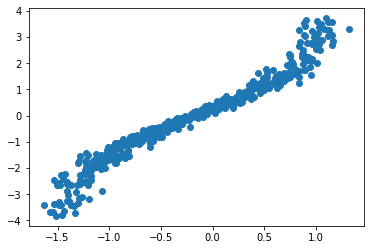

In [7]:
plt.plot(action_ratios, reward_ratios, marker='o', linestyle="None")